<a href="https://colab.research.google.com/github/Farry000/Capstone-Modul-2/blob/main/Capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISA AIRBNB BANGKOK**


Farry surachman

---



# INTRODUCTION

## ABSTRACT

Melihat pengaruh dari tipe kamar dan harga sangat berpengaruh terhadap availability kamar yang disewakan. Dengan hal ini pemilik kamar dapat melihat kekurangan dan potensi yang harus di tingkatkan untuk bersaing dalam bisnis penginapan.

Analisa dengan menggunakan pendekatan kombinasi antara tipe dari kamar yang disewakan pada list AirBnb  dan juga range harga dari berbagai jenis kamar yang dieswakan untuk setiap daerah yang terdapat pada list, terhadap pengaruh availibility kamar selama setahun. Dengan melihat hasil analisa ini diharapkan stakeholders dari AirBnb dapat memfokuskan marketing strateginya kepada jenis kamar yang memiliki nilai availability yang baik dari setiap daerah.

## BACKGROUND

Pada era moderen ini dimana internet sudah tersebar dengan luas dan mudah didapat, orang-orang dapat mendapatkan berbagai jenis informasi yang diinginkan dengan sangat mudah, salah satunya adalah informasi mengenai tempat menginap ketika ingin berpergian kesuatu tempat. Dalam bisnis penginapan hal ini sangat merubah kebiasaan dari pelanggan dimana tadinya ketika calon pelanggan ingin menginap disuatu daerah maka mereka akan menanyakan warga lokal atau supir taksi untuk mengetahui tempat penginapan yang bagus dan murah. Saat ini calon pelanggan dapat mencari berbagai jenis informasi mengenai tempat mereka akan menginap dengan smartphone, calon pelanggan sudah dapat melihat mengenai harga, lokasi, jenis kamar dan juga review dari suatu penginapan.

Maka dari itu AirBnb selaku bisnis yang bergerak pada bidang penyedia informasi mengenai penginapan harus selalu update terhadap informasi yang mereka miliki dari penginapan selain itu mereka juga harus dapat melihat jenis penginapan dan harga yang disukai oleh calon pelanggan. Salah satu cara untuk melihat hal tersebut adalah dengan melakukan analisa data dari ketersedian kamar tahun-tahun sebelumnya untuk setiap list yang kamar yang dimiliki.

# IMPORT LIBRARIES

---



In [ ]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For more interesting data visualization
import missingno as msno # For identifying and visualizing missing data
from datetime import datetime # For date manipulation

Fungsi dari Tiap Libraries :

1. Pandas digunakan untuk manipulasi data yang berdasarkan table. Library ini memiliki data strucrture yang sangat berguna untuk proses manipulasi data.

2. Numpy digunakan untuk melakukan operasi perhitungan angka, dan juga proses matematika pada array dan juga matriks.

3. Matploit.pylot merupakan modul dari matploit yang berguna untuk memvisualisasikan data kedalam bentuk seperti, histogram, diagram, pie chart, dll.

4. seaborn merupakan modul dari matploit yang digunakan untuk memvisualisasikan data, seaborn memiliki viualisasi grapic yang lebih menarik dan juga mendukung  analaisis statistik.

5. missingno library yang berfungsi untuk menampilkan data yang hilang pada dataset.

6. datetime berfungsi untuk merubah data ke bentuk waktu dan tanggalan, serta melakukan proses perhitungan waktu.
---



# DATA UNDERSTANDING


In [ ]:
# Show all columns
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('Airbnb Listings Bangkok.csv')
data

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Terdapat beberapa anomali pada tabel data, diantaranya adalah kolom Unnamed: 0, panjang digit kolom id, dan juga tulisan yang tidak menggunakan huruf latin / sulit dibaca

## INFORMASI TIPE DATA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

### KONKLUSI TIPE DATA

Dataset terdiri dari 15854 data entries dan 16 kolom. Mayoritas kolom bertipe int64 sebanyak 7 kolom yaitu host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availibility_365, number_of_reviews_ltm. Kemudian kolom bertipe object sebanyak 6 kolom yaitu id, name, host_name, neighbourhood, room_type, last_review. dan terakhir kolom bertipe float sebanyak 3 kolom yaitu latitude, longtitude, dan reviews_per_month


Akan tetapi ada beberapa kolom yang memiliki tipe data yang kurang tepat seperti kolom last_review yang lebih tepat menggunakan datetime.

## MENCARI DATA YANG HILANG

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
id,0
name,8
host_id,0
host_name,1
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### PERSENTASE DATA HILANG

In [ ]:
missing = data.isnull().sum().rename('Count').sort_values(ascending=False)

# Convert to DataFrame (from Series)
missing = pd.DataFrame(missing)
missing

,Count
reviews_per_month,5790
last_review,5790
name,8
host_name,1
Unnamed: 0,0
neighbourhood,0
latitude,0
id,0
host_id,0
room_type,0


In [ ]:
missing['Percentage'] = round(missing['Count'] / len(data) * 100, 2)
missing

,Count,Percentage
reviews_per_month,5790,36.52
last_review,5790,36.52
name,8,0.05
host_name,1,0.01
Unnamed: 0,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
id,0,0.00
host_id,0,0.00
room_type,0,0.00


### APAKAH DATA HILANG DAPAT DIKEMBALIKAN?

In [ ]:
# Menampilkan data name yang hilang
data[data['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [ ]:
# Menampilkan host_id 73275200
data[data['host_id'] == 73275200]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [ ]:
# Menampilkan data host_name yang hilang
data[data['host_name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


### KONKLUSI DATA HILANG

Data yang hilang terdapat pada 4 kolom dengan 2 kolom memiliki lebih dari 30% data hilang yaitu reviews_per_month dan last_review  dan 2 kolom memiliki kurang dari 1% data yang hilang yaitu host_name dan name. Data yang hilang pada kolom last_review akan dicoba untuk dikembalikan dengan merubah tipe data pada kolom tersebut menggunakan datetime, sedangkan untuk kolom reviews_per_month kemungkinan kolom tersebut akan dihilangkan karena dasar pengisian dari kolom tersebut masih ambigu. Untuk data name dan host_name yang hilang, jika memiliki lebih dari 1 listing maka akan di ganti dengan melihat host_id yang sama.

## MELIHAT DUPLIKASI DATA

In [ ]:
data.duplicated().sum()

np.int64(0)

### KONKLUSI DUPLIKASI DATA

Tidak adanya data yang duplikat sehingga dapat melanjutkan ke proses selanjutnya.

## Explatory Data Analys (EDA)

### NUMERIC VARIABLES

Numeric Variable adalah data yang memiliki bentuk variable berupa angka yang dapat diukur dan di kalkulasikan

#### DESCRIPTIVE STATISTIC

In [ ]:
data.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


##### DATA DENGAN PRICE 0

In [ ]:
data[data['price'] == 0]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


##### DATA DENGAN PRICE ATAU AVAILABILITY 0

In [ ]:
data[(data['price']== 0)|(data['availability_365'] == 0)]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
51,51,1019241,Chic two bedroom for Monthly rental,3323622,Phoebe,Bang Rak,13.726870,100.527250,Entire home/apt,2701,30,104,2020-02-20,0.89,1,0,0
61,61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.748140,100.520160,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
104,104,527553,"Beautiful Apt @ Ratchayothin BTS, Free Wifi",2592798,Nokina,Chatu Chak,13.828410,100.571030,Entire home/apt,1004,2,24,2018-07-22,0.19,2,0,0
141,141,1244333,"Private Room@Chatuchak,BTS,JJ market,DMK airport",2087671,Apipu,Phaya Thai,13.792210,100.546310,Private room,399,1,33,2020-03-15,0.78,1,0,0
152,152,1316688,Contemporary Modern Duplex - Thonglor,5394070,Eva,Khlong Toei,13.722420,100.579620,Entire home/apt,1489,30,81,2022-10-07,0.72,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15431,15431,779396995711655318,The Inspired Luxury: 1BR/MRT/Pool/JODD Fair,133082557,Jean,Huai Khwang,13.753800,100.574680,Entire home/apt,1400,2,0,NaN,NaN,19,0,0
15433,15433,779434871544801466,The Grand Luxury Suite:2BR 2WC /High Floor/Net...,133082557,Jean,Huai Khwang,13.759550,100.569950,Entire home/apt,3000,1,0,NaN,NaN,19,0,0
15438,15438,779503507904940932,Cosy Room near MBK Siam Paragon,214984794,Sita,Parthum Wan,13.741934,100.524283,Private room,1879,1,0,NaN,NaN,10,0,0
15498,15498,780301430602562032,Chill Out With Love :1BR WIFI/JOOD Fair/Pool,132745392,Mt,Huai Khwang,13.753780,100.574480,Entire home/apt,1000,2,0,NaN,NaN,25,0,0


##### KONKLUSI DATA DENGAN PRICE ATAU AVAILIBTY 0

Jika dilihat dari data price yang 0 dan juga nilai availability_365 juga 0, dimana kolom availability_365 menandakan ketersedian kamar selama setahun. Maka dapat disimpulkan bahwa Somerset Maison Asoke Bangkok memang tidak dibuka oleh host / pemilik kamar tersebut.


Akan tetapi terdapat data dimana kolom pricenya memiliki nilai dan hanya kolom availability_365 nya saja memiliki nilai 0. Maka akan coba dilakukan analisa lebih lanjut dengan melihat data dari kolom last_review dan juga reviews_per_month.

#### KONKLUSI DESCRIPTIVE STATISTIC

Berikut ini adalah kesimpulan dari tiap kolom berdasarkan data statistik deskriptif :

1.   **id** : Terdiri dari 158584 id yang unik dengan nomor id awal 27934 dan nomor id terakhir adalah 790476492384199044, merupakan unique indentifier untuk listing.
2.   **host id** : Terdiri dai 6659 unique host_id, merupakan unique indentifier untuk host/user.

3.   **latitude** : Proyeksi dari latitude suatu daerah dengan menggunakan World Geodetic System.
4.   **longitude** : Proyeksi dari longitude suatu daerah dengan menggunakan World Geodetic System.

5.   **Price** : Harga sewa kamar perharinya dengan harga bervariatif dimulai dari harga 0 sampai 1100000
6.   **Minimum Nights** : Lama minimal untuk menyewa kamar dengan nilai dimulai dari 1 sampai 1125 malam

7.   **Number of Reviews** : Jumlah reviews yang dimiliki dari suatu kamar dengan nilai dimulai dari 0 sampai 1124
8.   **reviews_per_month** : Jumlah reviews yang diterima setiap bulannya dari sebuah kamar setiap bulannya, memiliki nilai dari 0.01 sampai 19.13

1.   **calculated_host_listings_count** : Jumlah kamar yang dimilik oleh seorang host/user, memiliki nilai dari 1 sampai 228.
2.   **availability_365** : Ketersedian hari untuk membooking kamar selama setahun. Memiliki nilai yang dimulai dari 0 sampai 365.

1.   **number_of_reviews_ltm** : Jumlah reviews yang dimiliki kamar selama 12 bulan  terakhir, memiliki nilai minimal 0 sampai 325.













### HISTOGRAM GRAPH

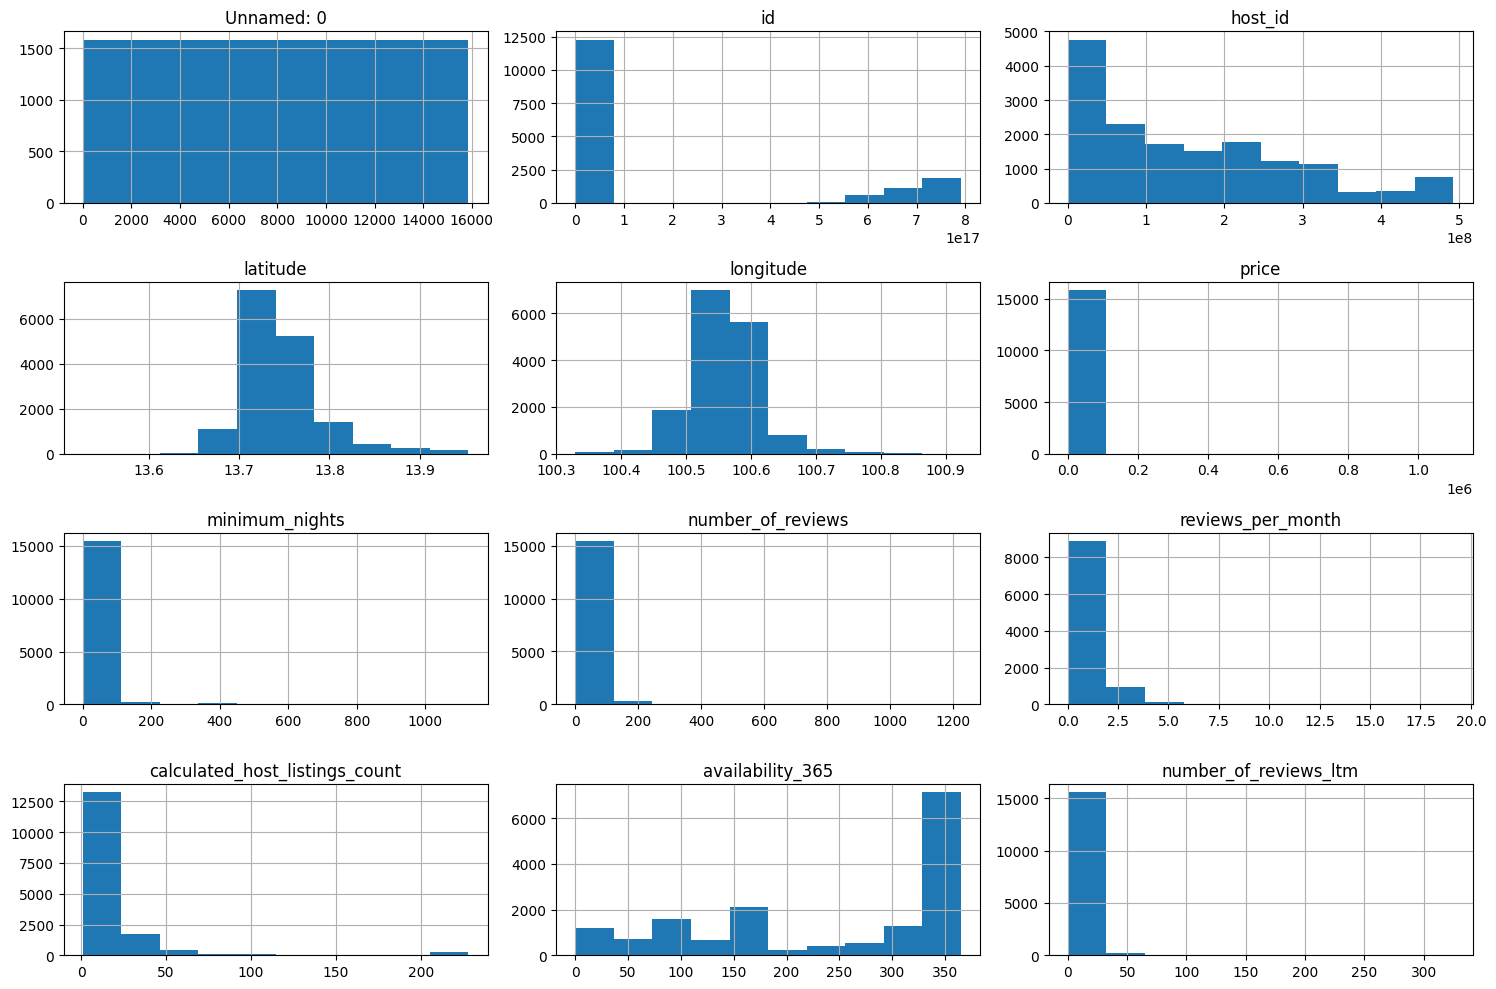

In [ ]:
# prompt: tampilkan histogram untuk setiap kolom numeric

import matplotlib.pyplot as plt
import numpy as np
# Select only the numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns

# Plot histograms for each numeric column
data[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### STATISTICAL TEST

Karena data Nan / data hilang tidak dapat di jalankan pada statistical test, maka akan di hapus untuk sementara

In [ ]:
# copy data
df_copy= data.copy()

# hapus data hilang pada data yang sudah di copy
df_copy = df_copy.dropna()

In [ ]:
# mengambil data numeric
numeric_columns = df_copy.select_dtypes(include=[np.number]).columns

Untuk mengetahui gambaran data secara garis besar, maka statistical test akan menggunakan beberapa jenis metode untuk memberikan akurasi yang lebih tepat pada proses analisa dan juga mengurangi eror dalam kesalahan membaca data.

In [ ]:
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
# Function to test normality
def normality_tests(data):
    results = {}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p_value)

    # Liliefors Test
    lilliefors_stat, lilliefors_p_value = lilliefors(data)
    results['Liliefors Test'] = (lilliefors_stat, lilliefors_p_value)

    # Shapiro-Wilk Test
    sw_stat, sw_p_value = stats.shapiro(data)
    results['Shapiro-Wilk'] = (sw_stat, sw_p_value)

    # D'Agostino and Pearson's Test
    dagostino_stat, dagostino_p_value = stats.normaltest(data)
    results['D\'Agostino Pearson'] = (dagostino_stat, dagostino_p_value)

    return results

# Function to determine normality based on p-value
def check_normality(p_value):
    if p_value > 0.05:
        return "Normal"
    else:
        return "Not Normal"

# Loop to test each numeric column
for column in numeric_columns:
    print(f"RESULTS FOR {column}:")
    results = normality_tests(df_copy[column])  # Removing missing values
    for test, (stat, p_value) in results.items():
        normality_status = check_normality(p_value)
        print(f"{test} - Statistic: {stat:.4f}, p-value: {p_value:.4f} -> {normality_status}")
    print("\n")

RESULTS FOR Unnamed: 0:
Kolmogorov-Smirnov - Statistic: 0.9998, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0639, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9535, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 9050.4418, p-value: 0.0000 -> Not Normal


RESULTS FOR id:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.4948, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.4990, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 2406.6780, p-value: 0.0000 -> Not Normal


RESULTS FOR host_id:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.1445, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.8896, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 1108.4432, p-value: 0.0000 -> Not Normal


RESULTS FOR latitude:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Stati

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10061.
  res = hypotest_fun_out(*samples, **kwds)


### OUTLIERS

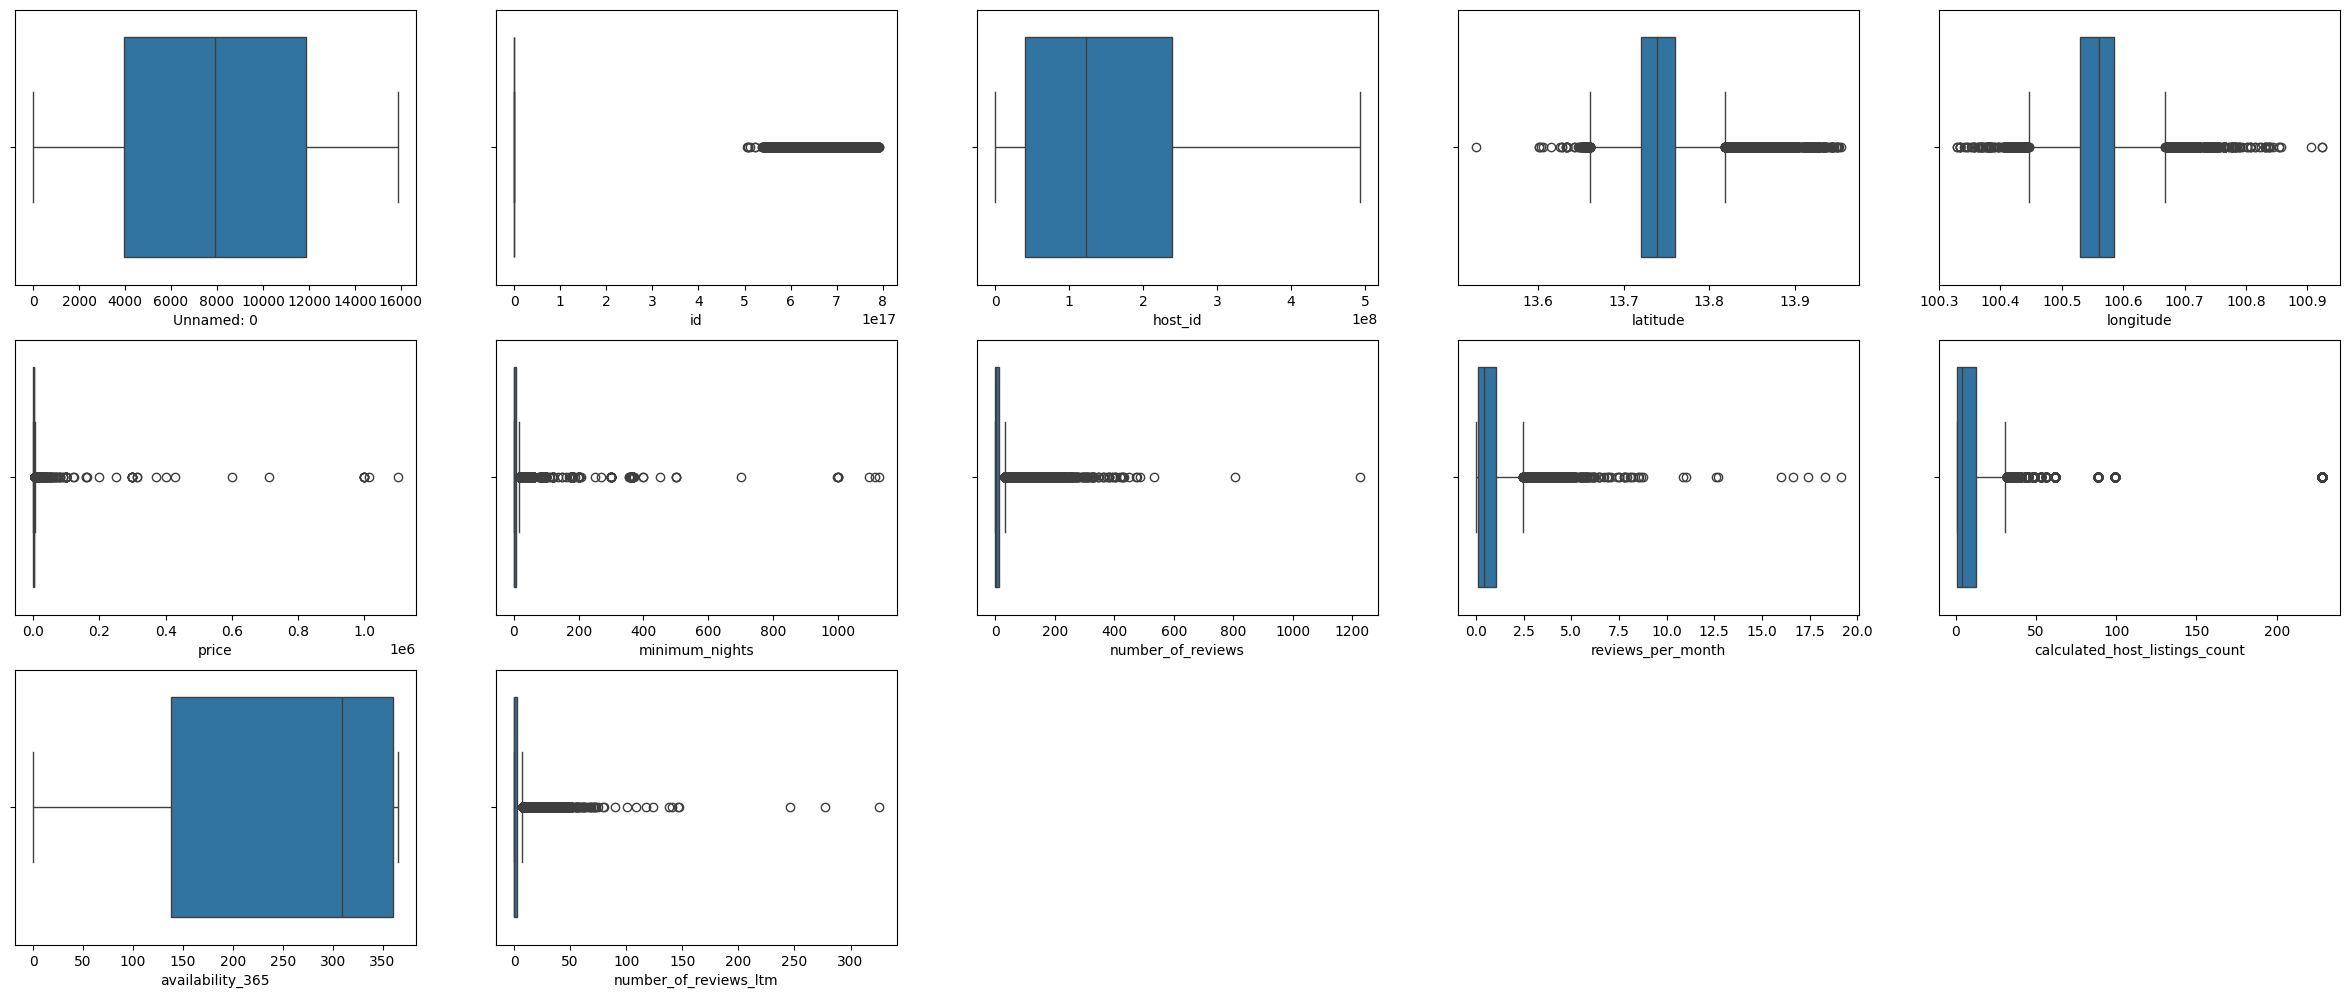

In [ ]:
# Select numeric columns
numeric_columns = data.select_dtypes(include='number')  # Includes float and int

plt.figure(figsize=(30, 25))  # (width, height)
position = 1
for column in numeric_columns.columns:
    plt.subplot(6, 5, position)  # (rows, columns, position)
    sns.boxplot(x=data[column])
    position += 1

# Display the plots
plt.show()

#### IQR

In [ ]:
# Select numeric columns only
numeric_columns = data.select_dtypes(include='number')
list_outliers_count = []

for column in numeric_columns.columns:
    q3 = numeric_columns.describe().loc['75%', column]
    q1 = numeric_columns.describe().loc['25%', column]
    iqr = q3 - q1
    whisker = 1.5 * iqr
    upper_bound = q3 + whisker
    lower_bound = q1 - whisker

    # Count of outliers
    outliers_count = len(data[(data[column] > upper_bound) | (data[column] < lower_bound)])
    list_outliers_count.append(outliers_count)

outliers_data = pd.DataFrame({
    'Column': numeric_columns.columns,
    'Outliers Count': list_outliers_count
})

In [ ]:
# Sort by 'Outliers Count' in descending order
outliers_data_sorted = outliers_data.sort_values(by='Outliers Count', ascending=False)
outliers_data_sorted

,Column,Outliers Count
1,id,3571
6,minimum_nights,3168
7,number_of_reviews,2240
11,number_of_reviews_ltm,2219
9,calculated_host_listings_count,1832
5,price,1403
3,latitude,1095
8,reviews_per_month,693
4,longitude,602
0,Unnamed: 0,0


#### OUTLIER PADA id

In [ ]:
# prompt: menampilkan data id yang terdiri dari 5 digit

id_5_digit = data[data['id'].astype(str).str.len() == 5]
id_5_digit

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
6,6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0
10,10,55681,Sathorn Terrace Apartment(61),263049,Tor,Bang Rak,13.71934,100.51760,Private room,1150,2,27,2019-01-03,0.19,7,320,0
12,12,55686,Comfy bedroom near River pier & BTS Taksin.,263049,Tor,Sathon,13.71802,100.51539,Hotel room,1862,2,208,2019-12-02,1.44,7,361,0
13,13,59221,budget hotel bangkok near subway,284095,Mimi,Din Daeng,13.77941,100.57383,Entire home/apt,910,2,3,2018-07-30,0.02,2,365,0
15,15,62217,Luxury@swimpool/FreeWiFi/nearJJMkt,302658,Srisuk,Phaya Thai,13.79152,100.53982,Private room,4156,1,0,NaN,NaN,1,365,0
17,17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.82298,100.56484,Entire home/apt,122594,2,9,2020-03-04,0.09,6,180,0


In [ ]:
# menampilkan data id yang terdiri dari 6 digit

id_more_than_5_digits = data[data['id'].astype(str).str.len() == 6]
id_more_than_5_digits

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0
9,9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700,2,4,2019-12-27,0.03,10,87,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.71516,100.56806,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
18,18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.73378,100.56303,Entire home/apt,5680,28,148,2020-01-07,1.08,1,334,0
20,20,960858,"New, Stylish & Luxury Studio Condo",3769704,Pat,Sai Mai,13.90770,100.64473,Private room,1500,1,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,226,923795,3BR 300 SqM Apt near BTS PhromPhong,4968824,Sanjay,Khlong Toei,13.72468,100.56838,Private room,3000,1,0,NaN,NaN,1,365,0
233,233,933070,Yoong Thong Double Standard Room,1203066,Tienchai,Min Buri,13.78318,100.74785,Private room,1620,30,0,NaN,NaN,2,365,0
234,234,933092,Rachapruk Twin Standard Room,1203066,Tienchai,Min Buri,13.78115,100.74820,Private room,1620,1,0,NaN,NaN,2,365,0
235,235,936765,Spacious 1 bed apartment close to BTS.,4785506,Ian,Phra Khanong,13.68469,100.60719,Entire home/apt,1290,30,2,2013-04-17,0.02,1,87,0


In [ ]:
# menampilkan data id yang terdiri dari 8 digit

id_8_digit = data[data['id'].astype(str).str.len() == 8]
id_8_digit

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1280,1280,10000720,Basic Bunk Bed Room near Wat Pho,20801609,Effie,Phra Nakhon,13.748550,100.498000,Private room,800,1,8,2020-01-19,0.16,7,336,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.753280,100.529280,Private room,930,1,6,2017-05-13,0.07,1,365,0
1284,1284,10008160,舒适空调全下铺7人间（中文服务）曼谷树青旅TreeHostel,49419222,Lee,Din Daeng,13.764160,100.563550,Shared room,363,1,0,NaN,NaN,5,365,0
1285,1285,10008444,舒适空调下铺7人间（中文服务）曼谷树青旅TreeHostel,49419222,Lee,Din Daeng,13.764510,100.564070,Shared room,363,1,2,2017-09-04,0.02,5,365,0
1287,1287,10009017,Room for 4 (Female only)/close to Platinium Mall,51113767,Metro Pratunam,Ratchathewi,13.750720,100.546620,Hotel room,5229,1,1,2019-01-01,0.02,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12315,12315,54357358,Nooch'Garden&House 2,69325437,Nooch'Garden&House,Taling Chan,13.784740,100.441790,Private room,850,1,0,NaN,NaN,2,365,0
12321,12321,54357361,Nooch'Garden&House,69325437,Nooch'Garden&House,Taling Chan,13.783480,100.441610,Private room,850,1,0,NaN,NaN,2,365,0
12322,12322,54358703,RETROPOLITAN > Conserved Shophouse > Old Town ...,24955578,Tor,Phra Nakhon,13.757550,100.503070,Entire home/apt,2771,2,18,2022-12-22,1.79,3,282,18
12323,12323,54358998,3 BD - Luxury Thai Villa in Sukumvit 24,8336931,Tontrakun,Khlong Toei,13.720817,100.566048,Entire home/apt,14971,365,12,2022-11-27,1.41,3,350,12


In [ ]:
# menampilkan data id yang terdiri dari lebih dari 8 digit

data[data['id'].astype(str).str.len() > 8]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12193,12193,504859704911743707,Khaosan road - free massage 1hr,321029505,Bas,Phra Nakhon,13.754919,100.500900,Private room,893,1,23,2022-12-18,1.84,6,315,21
12197,12197,507483048869347200,"HappyZleepy9_1 mins to Nana BTS,WiFi speed 500...",35082871,Ed,Khlong Toei,13.741290,100.553880,Entire home/apt,1591,1,49,2022-12-08,3.95,33,268,46
12199,12199,508182673678170465,"HappyZleepy6_2 mins to Nana BTS,WiFi speed 500Mbs",35082871,Ed,Vadhana,13.740530,100.556270,Entire home/apt,1536,1,56,2022-12-17,4.35,33,253,55
12200,12200,512565700366009801,"Comfortable studio in Bangkok, 5-min walk from...",267104110,Moon,Bang Na,13.660020,100.605990,Entire home/apt,1000,1,18,2022-12-21,2.89,4,259,18
12201,12201,522092295812215114,Thonglor lovely 2 bed condo near BTS (3 month up),103221633,Fang,Vadhana,13.726390,100.579420,Entire home/apt,2500,90,0,NaN,NaN,1,358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


##### KONKLUSI OUTLIERS IN id

Dari data pada kolom id yang dimulai dari 5 digit dan jika jumlah data ada lebih dari 15000 baris maka masih masuk akal jika panjang digit data pada kolom id sampai 8 digit, akan tetapi ada banyak data yang panjang lebih dari 8 digit dan hal ini sangat tidak diperlukan. Dikarenakan hanya dengan 8 digit saja id untuk setiap kamar yang ada pada data sudah unique walaupun memiliki nama dan tipe kamar yang sama dan hanya dibedakan berdasarkan lokasi latitude dan longitude. Untuk itu akan dilakukan cleaning data pada kolom id dengan cara membatasi digit pada kolom id menjadi 8 digit saja.

#### OUTLIER PADA minimum_nights

In [ ]:
# Menampilkan data minimum nights bernilai 1

data[data['minimum_nights'] == 1]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
15,15,62217,Luxury@swimpool/FreeWiFi/nearJJMkt,302658,Srisuk,Phaya Thai,13.791520,100.539820,Private room,4156,1,0,NaN,NaN,1,365,0
20,20,960858,"New, Stylish & Luxury Studio Condo",3769704,Pat,Sai Mai,13.907700,100.644730,Private room,1500,1,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,15848,790460476887978054,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.752904,100.540381,Private room,1400,1,0,NaN,NaN,14,357,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [ ]:
#Menampilkan data minimum nights lebih dari 16
data[data['minimum_nights'] > 16]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
5,5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.697570,100.528800,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
16,16,1791481,Nice and Quiet condo near BTS Onnut,9399478,Piyakorn,Khlong Toei,13.707190,100.599360,Entire home/apt,1577,30,78,2019-05-31,0.78,1,330,0
18,18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.733780,100.563030,Entire home/apt,5680,28,148,2020-01-07,1.08,1,334,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15805,15805,789440470509021553,supremesky pool@chitlom,342811212,Miu Miu,Ratchathewi,13.750080,100.540229,Entire home/apt,2343,29,0,NaN,NaN,23,328,0
15833,15833,790283533781929861,iSanook Suite 34 sqm 8,8663142,ISanook Hotel,Bang Rak,13.733555,100.522394,Private room,1900,30,0,NaN,NaN,45,363,0
15839,15839,790404714116491557,Ratchada Condo next To MRT,34432625,Alex,Huai Khwang,13.763732,100.569455,Entire home/apt,2100,28,0,NaN,NaN,2,332,0
15840,15840,790441848994752308,Sukhumvit Condo Next to BTS,34432625,Alex,Bang Na,13.665395,100.603951,Entire home/apt,1400,28,0,NaN,NaN,2,364,0


In [ ]:
# Menampilkan data minimum nights lebih dari 365
data[data['minimum_nights'] > 365]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
61,61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
324,324,2489610,NEW 65Sqm 2BD 2BR Sukhumvit26 Emquartier Emporium,12743033,Thanan,Khlong Toei,13.72699,100.56988,Entire home/apt,2043,370,23,2017-10-21,0.23,2,365,0
1134,1134,7625178,วิวล่า สิขลา,39999413,อัครพล,Vadhana,13.74159,100.57977,Private room,65000,399,0,NaN,NaN,1,365,0
1200,1200,8801560,"30th floor, 10 min to BTS, Seaview",4517723,Kannicha,Bang Na,13.66417,100.64955,Entire home/apt,35000,998,20,2022-10-30,0.26,7,365,5
1592,1592,10709131,"34Fl 2, M Ladprao Condo,MRT & Malls",32398198,Touchapon,Chatu Chak,13.81699,100.56292,Entire home/apt,760,700,61,2019-08-25,0.73,2,364,0
1833,1833,12046101,Near BTS Onnut Convenience house,22676472,Kuan,Suanluang,13.71161,100.60344,Entire home/apt,1300,500,2,2016-07-30,0.02,3,363,0
3694,3694,19893829,2 Bedroom Suite@Kirthana Residence,64131143,Chetna,Vadhana,13.73917,100.56616,Entire home/apt,7286,500,0,NaN,NaN,3,48,0
4194,4194,22059876,C,160989331,Annchalee,Thon buri,13.71693,100.48330,Private room,161516,500,3,2018-07-31,0.05,1,0,0
7986,7986,35165443,Wonderful apartment for you holiday in Thai,86991723,Yang,Bang Na,13.67260,100.60352,Entire home/apt,2000,1115,0,NaN,NaN,2,358,0
8608,8608,37270784,นพกรณ์ แมนชั่น Noppakorn Mansion,271222372,Noppakorn,Lat Phrao,13.81852,100.59248,Entire home/apt,450,450,0,NaN,NaN,1,364,0


##### KONKLUSI PADA OUTLIER DI minimum_nights

Terdapat outlier pada nilai minimum nights lebih dari 16 hari sebanyak 3168, ada juga outlier yang melebihi 365 hari. Hal ini masih dapat diterima karena mayoritas data yang minimal malam untuk sewa lebih dari 365 hari memiliki tipe Entire Home/apt dan hal ini sangat wajar jika ada pemilik rumah yang minimal penyewaan rumahnya lebih dari satu tahun. Jadi data masih dapat diterima secara logika.

#### OUTLIER PADA number_of_reviews

Dari hasil deskripsi data pada kolom number of reviews didapat bahwa nilai mean 16 dan nilai yang memiliki sebaran terbanyak dekat nilai mean adalah 2. jadi didapat nilai batas wajar untuk number of review adalah 32

In [ ]:
# Menampilkan data number of reviews lebih dari 32

data[data['number_of_reviews'] > 32]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
11,11,1765918,2BR apt in a cozy neighborhood,9279712,Jing,Phaya Thai,13.77486,100.542720,Entire home/apt,1893,15,129,2022-09-30,1.17,1,356,1
12,12,55686,Comfy bedroom near River pier & BTS Taksin.,263049,Tor,Sathon,13.71802,100.515390,Hotel room,1862,2,208,2019-12-02,1.44,7,361,0
16,16,1791481,Nice and Quiet condo near BTS Onnut,9399478,Piyakorn,Khlong Toei,13.70719,100.599360,Entire home/apt,1577,30,78,2019-05-31,0.78,1,330,0
18,18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.73378,100.563030,Entire home/apt,5680,28,148,2020-01-07,1.08,1,334,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,13021,640493624884896939,Sukhumvit 1-bedroom apartment GP House - COZY,171603843,Arisudan Gopal,Suanluang,13.70872,100.605790,Entire home/apt,650,1,37,2022-12-27,5.58,11,303,37
13168,13168,623699400990285914,1网红50层超豪华空中泳池健身房Asoke商圈市中心双轨BTS/MRT+Nana/Soico...,129986395,Ed,Vadhana,13.73968,100.562670,Entire home/apt,2150,1,33,2022-11-24,4.67,13,278,33
13172,13172,624225259936181515,CENTRAL & CLASSY ※ 5-min Skytrain ASOK ※ NICE ...,30386490,N'Dee,Khlong Toei,13.73632,100.558840,Entire home/apt,4950,1,34,2022-12-21,4.47,23,40,34
13177,13177,656164225695350804,1 Bedroom Suite [Silom-Sathorn],340150263,Bandara,Bang Rak,13.72581,100.538228,Private room,3571,1,101,2022-12-14,17.41,18,304,101


##### KONKLUSI PADA OUTLIER number_of_reviews

Data yang memiliki nilai lebih dari 32 dianggap sebagai outlier, akan tetapi untuk saat ini data masih dibiarkan untuk kepentingan analisa lebih lanjut

#### OUTLIER PADA number_of_reviews_ltm

Dikarenakan nilai standar deviasi dan mean tidak terlalu jauh, makan akan dicoba menggunakan nilai sekitar standar deviasi untuk melihat outliernya

In [ ]:
# Menampilkan data number_of_reviews_ltm lebih dari 7
data[data['number_of_reviews_ltm'] > 7]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
28,28,145343,Boutique Rooms Near Bangkok Airport,703944,Parinya,Lat Krabang,13.721868,100.771713,Private room,1329,1,28,2022-11-25,0.28,1,349,13
43,43,988373,BangLuang House 2@ Bangkok Thailand,5325919,วสวัตติ์,Phasi Charoen,13.731220,100.462280,Entire home/apt,1795,1,95,2022-12-15,0.80,3,339,10
47,47,1862377,☞Downtown Central Studio-Bangkok MRT,8214044,Evan From Sanctuary House,Sathon,13.720630,100.546940,Entire home/apt,1200,1,310,2022-12-11,3.00,8,331,9
49,49,1887544,"""Serviced 2 Bed Scenic SkyVillas""",6132593,Salvatore,Sathon,13.720960,100.529110,Entire home/apt,3757,2,118,2022-11-30,1.07,7,134,12
53,53,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,2022-12-15,4.02,7,320,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,14902,750360890702349752,Bangkok Cheesy room by The Locals - (newly ope...,483119696,The Locals,Phra Nakhon,13.758960,100.492380,Entire home/apt,1223,1,15,2022-12-26,8.65,10,300,15
14903,14903,750391908732827657,Bangkok Cheesy room by The Locals - (newly ope...,483119696,The Locals,Phra Nakhon,13.760595,100.492367,Entire home/apt,1322,1,13,2022-12-25,7.80,10,312,13
14904,14904,750392237778434745,Bangkok The locals - Ideal room for family/fri...,483119696,The Locals,Phra Nakhon,13.760731,100.492206,Entire home/apt,1537,1,15,2022-12-15,8.49,10,302,15
14918,14918,751025303076300052,Breathtaking River View 5min walk-train cozy room,315867023,Alex,Bang Rak,13.723820,100.524260,Entire home/apt,3683,2,8,2022-12-18,5.71,3,306,8


##### KONKLUSI OUTLER PADA number_of_reviews_ltm

Untuk saat ini data outler pada kolom number_of_reviews_ltm tidak dihapus karena takut mempengaruhi hasil analisa lebih lanjut

#### OUTLIER PADA calculated_host_listings_count

In [ ]:
# Menampilkan data calculated host listings count lebih dari 31

data[data['calculated_host_listings_count'] > 31]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5,5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.697570,100.528800,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
41,41,1862089,❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,1200,1,419,2022-12-07,3.77,37,355,1
73,73,385130,❂Citycenter✔Subway station✔Private Bathroom4Ai...,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,800,1,396,2020-04-30,3.02,37,361,0
80,80,393066,✺✺99 feet in the sky✺✺,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,829,1,430,2022-10-01,3.39,37,334,10
89,89,413824,❂100% Private&Central Light EnSuite,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,800,1,325,2020-03-14,2.67,37,358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15783,15783,787294451273878620,5days!New!Bang Phlat MRT 600m/swiming pool/gym,201677068,Curry,Bang Phlat,13.788938,100.503600,Entire home/apt,3822,5,0,NaN,NaN,228,311,0
15786,15786,788623219193177366,Songphra Studio Women's Apt. 1,8663142,ISanook Hotel,Bang Rak,13.733050,100.522830,Private room,700,30,0,NaN,NaN,45,331,0
15802,15802,789093052199171786,T6 32FLuxury Condo 2bedrooms Park24,347302995,Sophia,Khlong Toei,13.726140,100.566750,Entire home/apt,3600,1,0,NaN,NaN,39,353,0
15808,15808,789555053788989734,Boutique room near Khaosarn Road,8444643,Kiattisak,Phra Nakhon,13.756073,100.501863,Private room,1500,1,0,NaN,NaN,53,365,0


##### KONKLUSI OUTLIER PADA calculated_host_listings_count

Terdapat outlier dengan nilai lebih dari 31. untuk saat ini data outlier masih dibiarkan dan tidak dihapus, karena takut mempengaruhi hasil analisa lebih lanjut

#### OUTLIER PADA price

In [ ]:
# Menampilkan data price lebih dari 4720
data[data['price'] > 4720]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
17,17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,2020-03-04,0.09,6,180,0
18,18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.733780,100.563030,Entire home/apt,5680,28,148,2020-01-07,1.08,1,334,0
19,19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2022-11-22,2.59,1,349,3
34,34,978531,Urban Oasis in the heart of Bangkok,5309669,Apiradee,Sathon,13.722910,100.537590,Entire home/apt,5429,2,3,2018-12-18,0.03,3,174,0
48,48,185364,Beautiful Wood Bangkok Resort House,889670,Narumon,Nong Chok,13.779000,100.836710,Entire home/apt,8658,1,0,NaN,NaN,1,363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,15756,786741911434733026,Private Home for 12-16 Guests 8 Parking,435016000,Tadchon,Lat Phrao,13.827958,100.591895,Entire home/apt,17900,2,0,NaN,NaN,10,362,0
15757,15757,786742271004207966,Private Hotel for 12-16 Guests,435016000,Tadchon,Chatu Chak,13.821809,100.563067,Private room,17900,2,0,NaN,NaN,10,362,0
15765,15765,786834873763460489,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.735632,100.567862,Entire home/apt,7589,1,0,NaN,NaN,44,364,0
15766,15766,786852847114140309,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.734753,100.566682,Entire home/apt,7589,1,0,NaN,NaN,44,364,0


In [ ]:
# Menampilkan data neighbourhood chatu chak
data[data['neighbourhood'] == 'Chatu Chak']

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
8,8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.816930,100.564330,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0
17,17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,2020-03-04,0.09,6,180,0
45,45,1016487,Private room in Bangkok,5594281,Yodying,Chatu Chak,13.821480,100.583260,Private room,350,30,0,NaN,NaN,1,365,0
59,59,296960,Luxury&Comfy wthWifi walk-distance to Subwy-Malls,175729,Mitch & Mam,Chatu Chak,13.809260,100.568920,Entire home/apt,900,358,56,2019-08-04,0.43,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,15751,786645021586087458,"Very New, 3min BTS Phahonyothin 24, 32sqm 4FL",458715536,Nc,Chatu Chak,13.822602,100.563676,Entire home/apt,720,29,0,NaN,NaN,9,333,0
15757,15757,786742271004207966,Private Hotel for 12-16 Guests,435016000,Tadchon,Chatu Chak,13.821809,100.563067,Private room,17900,2,0,NaN,NaN,10,362,0
15781,15781,787253999776900513,"Siam Plaengna-Napee9 Room, Chatuchak",311909791,Siamplaengna,Chatu Chak,13.798903,100.564166,Private room,950,2,0,NaN,NaN,13,349,0
15788,15788,788687430580578894,"Newly-Private-Cozy Room, Formosa Ratchayothin-BKK",385694484,Sirote,Chatu Chak,13.823683,100.570621,Private room,850,28,0,NaN,NaN,5,180,0


In [ ]:
# menampilkan data price yang memiliki lebih dari 5 digit
data[data['price'].astype(str).str.len() > 5]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
17,17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,2020-03-04,0.09,6,180,0
393,393,4450156,"Stylish Apartment in Bangkok, MRT",23095883,Thanakrit,Huai Khwang,13.755950,100.567800,Entire home/apt,100000,365,0,NaN,NaN,1,365,0
1239,1239,8880974,"Modern,wifi,5m MRT&2 Shopping Mall",30803267,Yasmine,Huai Khwang,13.759950,100.569360,Entire home/apt,1000000,100,45,2016-09-05,0.51,4,180,0
1779,1779,11579635,"2 Bedroom,wifi,5mMRT&Shopping Mall",30803267,Yasmine,Huai Khwang,13.754710,100.565980,Entire home/apt,1000000,100,53,2018-02-20,0.64,4,249,0
1850,1850,12056763,Charoenkrung Road House/Office Rent,62898498,Charlie,Bang Rak,13.727880,100.518720,Entire home/apt,300000,365,0,NaN,NaN,1,365,0
1986,1986,13033135,Airport-MRT-ShowShopFood-FullFN,34158729,Chayakorn,Din Daeng,13.784330,100.570660,Private room,300000,120,0,NaN,NaN,1,358,0
2507,2507,15380964,"Resort Style Luxury apartment,5min to MRT,free...",30803267,Yasmine,Huai Khwang,13.758770,100.569430,Entire home/apt,100686,1,40,2019-09-13,0.55,4,180,0
2568,2568,16045517,"BTS Wongwianyai, Rooftop Pool, Wifi",94426146,Wanlapatch,Khlong San,13.721550,100.495170,Entire home/apt,160000,3,20,2018-04-26,0.27,1,179,0
2668,2668,16139502,Nice Check-in My Hostel (Private 2 beds),51074483,Nuttawut,Ratchathewi,13.751130,100.527310,Hotel room,300000,1,2,2020-02-23,0.03,5,365,0
4194,4194,22059876,C,160989331,Annchalee,Thon buri,13.716930,100.483300,Private room,161516,500,3,2018-07-31,0.05,1,0,0


##### KONKLUSI OUTLIER PADA price

Outlier pada kolom price yang memiliki 4 digit tidak dihapuskan karena masih masuk kedalam nilai standar deviasi, Sedangkan Outlier pada kolom price yang memiliki lebih dari 5 digit akan dihapus karena tidak memiliki dasar kejelasan dari nilai tersebut dan juga tidak mengganggu analisa lebih lanjut.

#### OUTLIER PADA reviews_per_month

In [ ]:
# Menampilkan data reviews_per_month lebih dari 2.5
data[data['reviews_per_month'] > 2.5]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
19,19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2022-11-22,2.59,1,349,3
41,41,1862089,❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,1200,1,419,2022-12-07,3.77,37,355,1
46,46,1862331,☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs...,8214044,Evan From Sanctuary House,Sathon,13.720730,100.546900,Entire home/apt,1450,1,268,2022-12-15,2.59,8,350,7
47,47,1862377,☞Downtown Central Studio-Bangkok MRT,8214044,Evan From Sanctuary House,Sathon,13.720630,100.546940,Entire home/apt,1200,1,310,2022-12-11,3.00,8,331,9
53,53,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,2022-12-15,4.02,7,320,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15563,15563,782166675497170300,Deluxe Design 2 Bedroom | Ekkamai,46163812,Ernest,Vadhana,13.723670,100.585970,Entire home/apt,4785,28,3,2022-12-28,3.00,8,365,3
15631,15631,784785046365802167,1- Life AsokeHype-mrt rame9 500m,402093105,Hi Gravity,Ratchathewi,13.754445,100.563017,Entire home/apt,2328,15,3,2022-12-23,3.00,45,352,3
15633,15633,784801495543432870,3- Life AsokeHype-mrt rame9 500m -Infinity pool,402093105,Hi Gravity,Ratchathewi,13.754910,100.562530,Entire home/apt,2328,15,5,2022-12-21,5.00,45,352,5
15743,15743,786248090308669514,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.730126,100.586369,Entire home/apt,3932,1,3,2022-12-24,3.00,8,349,3


##### KONKLUSI PADA OUTLIER reviews_per_month

Outlier untuk pada kolom reviews_per_month tidak memiliki dasar kejelasan dari nilai tersebut, hal ini pun juga meliputi seluruh nilai dari pada kolom tersebut. Jadi kolom reviews_per_month akan dihapuskan karena tidak memiliki dasar penilaian yang jelas dan juga tidak mengganggu analisa lebih lanjut.

#### KONKLUSI DARI OUTLIER

Outlier berfokus pada outlier dari kolom Price dimana terdapat beberapa data yang memiliki rentang nilainya terlalu jauh dari standar deviasi dimana nilainya memiliki lebih dari 4 digit dan tidak adanya landasan yang kuat dari nilai outlier tersebut didapat. Hal ini juga serupa terhadap nilai pada kolom reviews_per_month dimana tidak ada patokan atau acuan yang kuat untuk mendapatkan nilai tersebut.

### CORRELATION

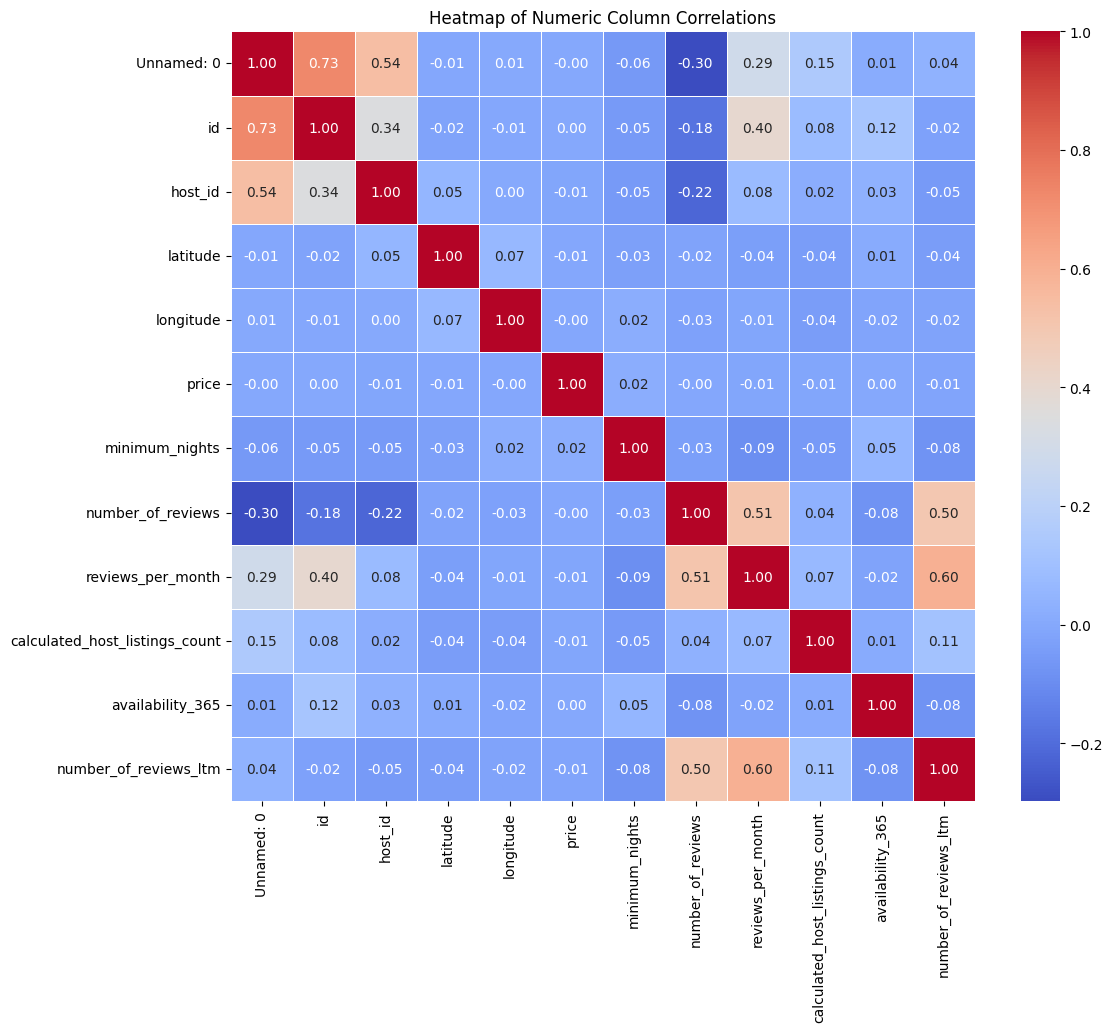

In [ ]:
# Selecting only the numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Creating the heatmap
plt.figure(figsize=(12, 10)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Numeric Column Correlations')
plt.show()

#### KONKLUSI CORRELATION

Dengan menggunakan metode corr dan heatmap untuk menentukan korelasi tiap kolom numeric diperoleh beberapa hasil korelasi:


1.   Ada beberapa kolom yang memiliki tingkat korelasi cukup tinggi :


      *   number_of_reviews_ltm dan reviews_per_month (0.6)
      *   number_of_reviews dan reviews_per_month (0.51)
      *   number_of_reviews dan number_of_reviews_ltm (0.5)


2.   Lalu untuk kolom price dengan kolom availability_365 tidak memiliki nilai korelasi sama sekali (0) ini menandakan harga listings kamar tidak ada kaitannya dengan ketersedian kamar tersebut dalam satu tahun



### CATEGORY VARIABLES

#### DESCRIPTIVE STATISTICS

In [ ]:
data.describe(include = 'object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


#### UNIQUE VALUES

In [ ]:
# take all categorical ones
kategorik = data.select_dtypes(include = 'object')

# calculate unique values ​​of each variable
kategorik.nunique()

,0
name,14794
host_name,5312
neighbourhood,50
room_type,4
last_review,1669


/tmp/ipython-input-40-1093055509.py:13: UserWarning: Glyph 65281 (\N{FULLWIDTH EXCLAMATION MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # so as not to collide
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65281 (\N{FULLWIDTH EXCLAMATION MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


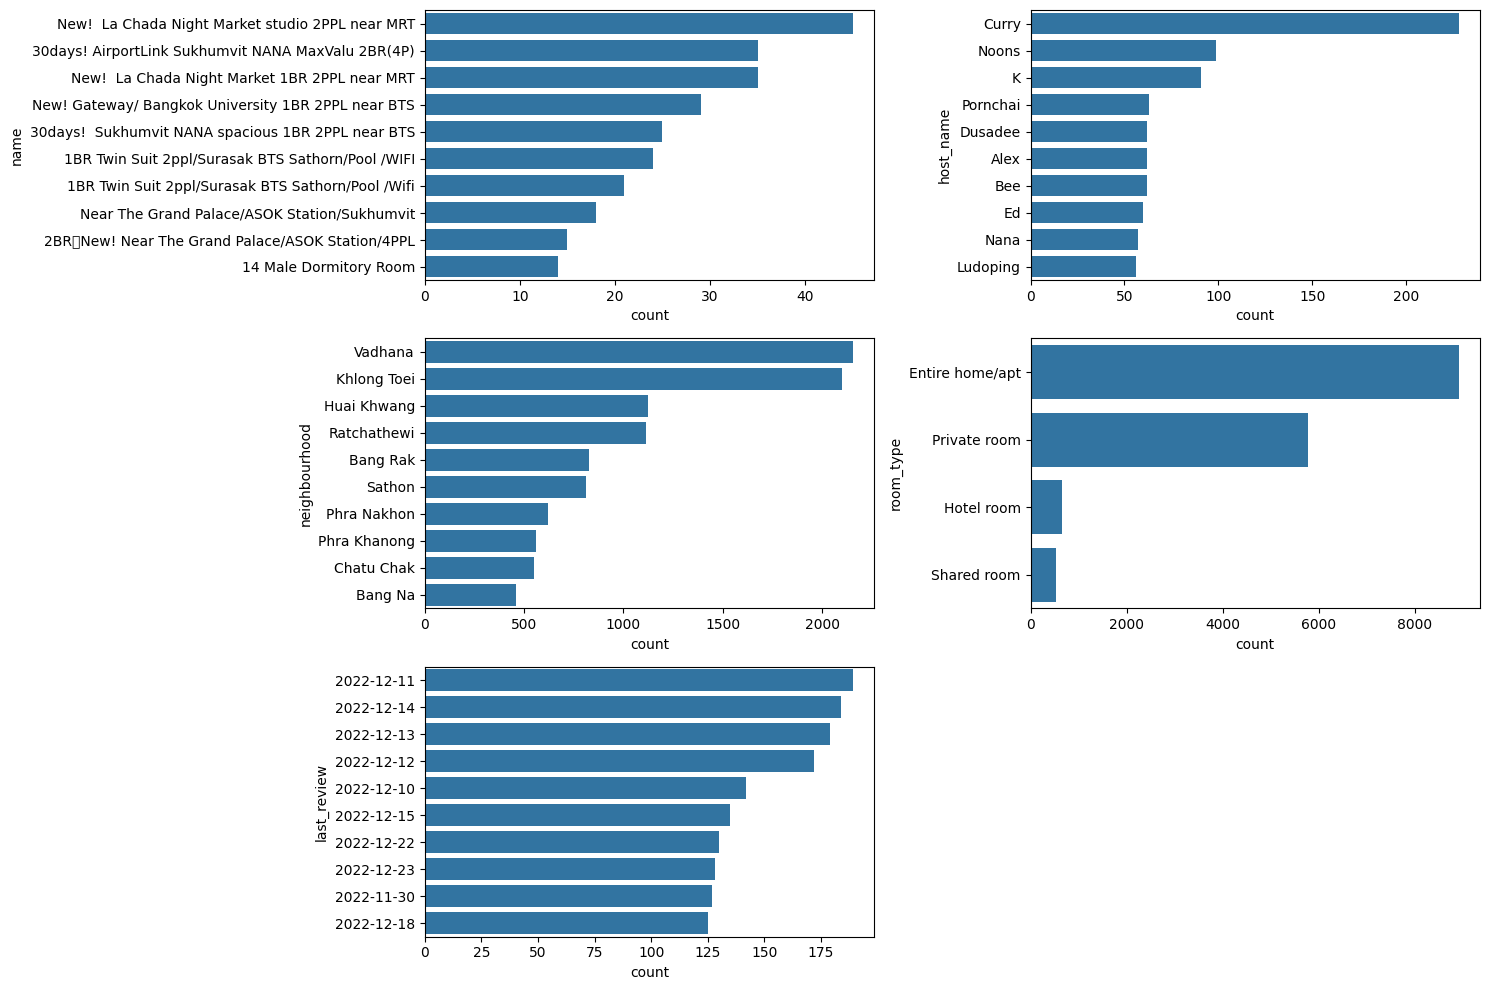

In [ ]:
# take all categorical ones
kategorik = data.select_dtypes(include = 'object')

plt.figure(figsize = (15,10)) # (column, row)
posisi = 1



for kolom in kategorik.columns:
    plt.subplot(3, 2, posisi) # (row, column, position)
    sns.barplot(data[kolom].value_counts().sort_values(ascending = False).head(10), orient = 'h')
    posisi += 1
    plt.tight_layout() # so as not to collide

# print graph
plt.show()

##### KONKLUSI UNIQUE VALUES

Kolom last_review yang memiliki tipe data object, harus segera diganti menjadi datetime karena data yang terdapat pada kolom berupa tanggalan hari bulan dan tahun

# KONKLUSI DATA UNDERSTANDING



1.   Saat pertama kali data di baca langsung terlihat kejannggalan pada data, diantaranya adalah kolom unnamed 0:, panjang digit dari sebagian data pada kolom id, tulisan yang tidak menggunakan huruf latin atau sulit dibaca pada kolom name. Akan dilakukan penghapusan pada kolom unnamed 0:, penyederhanaan digit untuk kolom id, serta membuat tulisan pada kolom name dapat dibaca pada data cleansing nanti.

2.   Data yang hilang ada pada kolom last_review dan reviews_per_month, masing masing memiliki 36% data hilang. Untuk data hilang pada kolom last_review dapat diperbaiki dengan cara mengisikan "Tidak ada review" pada data yang hilang, sedangkan untuk data hilang pada reviews_per_month dapat diisikan dengan angka 0 untuk perbaikannya.

3.   Tidak adanya duplikasi data
4.   Dari descriptive statistic terdapat data dengan nilai price dan availability_365 0, dan berasumsi bahwa bahwa ada korelasi dari data pada kolom price dan dan availability_365 akan tetapi setelah analisa lebih lanjut menggunakan metode corr dan heatmap didapatkan bahwa tidak ada korelasi dari data kedua kolom tersebut

5.   Berdasarkan Statistical test banyak sebaran data yang tidak normal
6.   Terdapat beberapa data pada kolom price yang panjang digitnya lebih dari 4 digit hal ini sangat jauh dari nilai standar deviasi yang ada.

7.   tipe data dari kolom last_review harus diganti menggunakan date dikarenakan data tersebut menunjukan waktu tanggal terakhir listing mendapatkan review










# DATA CLEANING

Dikarenakan data yang bernilai Nan / hilang ada lebih dari 30% maka akan di lakukan data cleaning terlebih dahulu untuk mencoba memperbaiki data Nan tersebut. Sehingga ketika nanti dilakukan statistic test maka hasilnya dapat lebih akurat.

## MENGHAPUS KOLOM Unnamed: 0

In [ ]:
# menghapus kolom unnamed

data = data.drop('Unnamed: 0', axis=1)
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## MEMBATASI KOLOM id MENJADI 8 DIGIT

In [ ]:
#  membatasi digit kolom id menjadi 8 digit
import pandas as pd
data['id'] = data['id'].astype(str).str[:8]
data['id'] = pd.to_numeric(data['id'])
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,79046504,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,79047450,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,79047533,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,79047554,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## MENGISIKAN DATA NaN PADA KOLOM LAST REVIEW DENGAN "0" DAN MENGGANTI TIPE DATA MENJADI DATETIME

In [ ]:
# Mengubah tipe data kolom 'last_review' menjadi datetime
# Karena ada nilai 0, kita perlu menanganinya. Kita bisa mengubah 0 menjadi NaN atau menggunakan format datetime yang memungkinkan nilai null.
# Mengubah 0 menjadi None (yang akan diinterpretasikan sebagai NaN oleh pandas)
data['last_review'] = data['last_review'].replace(0, np.nan)

# Mengubah tipe data menjadi datetime
# Gunakan errors='coerce' untuk mengubah nilai yang tidak valid menjadi NaT (Not a Time)
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

In [ ]:
data['last_review'] = data['last_review'].fillna(0)
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,79046504,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,NaN,1,362,0
15850,79047450,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,NaN,14,365,0
15851,79047533,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,NaN,14,365,0
15852,79047554,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,NaN,14,365,0


In [ ]:
# Mengecek jumlah data yang hilang pada kolom 'last_review'
print("Jumlah data hilang pada kolom 'last_review' setelah pengisian:", data['last_review'].isna().sum())

Jumlah data hilang pada kolom 'last_review' setelah pengisian: 0


## MENGISIKAN DATA NaN PADA KOLOM review_per_month DENGAN "0"

In [ ]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,79046504,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,79047450,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,79047533,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,79047554,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


In [ ]:
# Mengecek jumlah data yang hilang pada kolom 'reviews_per_month'
print("Jumlah data hilang pada kolom 'reviews_per_month' setelah pengisian:", data['reviews_per_month'].isna().sum())

Jumlah data hilang pada kolom 'reviews_per_month' setelah pengisian: 0


In [ ]:
# Mengecek apakah ada data jika number_of_reviews 0 tetapi reviews_per_month tidak 0
data[(data['number_of_reviews'] == 0) & (data['reviews_per_month'] != 0)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


## MENGELOMPOKAN PRICE KEDALAM RANGE 20000

In [ ]:
# Tampilkan tabel informasi kolom price

data[['price']].describe()

,price
count,1.585400e+04
mean,3.217704e+03
std,2.497212e+04
min,0.000000e+00
25%,9.000000e+02
50%,1.429000e+03
75%,2.429000e+03
max,1.100000e+06


In [ ]:
# prompt: Mengelompokan data pada price dalam range 20000

import pandas as pd
# Membuat kolom baru untuk mengelompokkan price
bins = range(0, data['price'].max() + 20001, 20000)
labels = [f'{i}-{i+19999}' for i in bins[:-1]]
data['price_range'] = pd.cut(data['price'], bins=bins, labels=labels, right=False, include_lowest=True)

# Menampilkan jumlah data dalam setiap range price
print(data['price_range'].value_counts().sort_index())

# Menampilkan data dengan kolom price_range
print(data[['price', 'price_range']].head())


price_range
0-19999            15716
20000-39999           70
40000-59999           13
60000-79999           10
80000-99999            6
100000-119999         11
120000-139999          2
140000-159999          1
160000-179999          2
180000-199999          0
200000-219999          1
220000-239999          0
240000-259999          1
260000-279999          0
280000-299999          0
300000-319999          9
320000-339999          0
340000-359999          0
360000-379999          1
380000-399999          0
400000-419999          1
420000-439999          1
440000-459999          0
460000-479999          0
480000-499999          0
500000-519999          0
520000-539999          0
540000-559999          0
560000-579999          0
580000-599999          0
600000-619999          1
620000-639999          0
640000-659999          0
660000-679999          0
680000-699999          0
700000-719999          1
720000-739999          0
740000-759999          0
760000-779999          0
780000-799999

In [ ]:
# Mengelompokkan data berdasarkan room_type, availability_365, dan price_range
grouped_data = data.groupby(['room_type', 'price_range'])['availability_365'].mean().reset_index()

# Menampilkan hasil pengelompokan
print(grouped_data)

# Atau jika ingin melihat rata-rata availability_365 per room_type dan price_range dalam bentuk pivot table
pivot_table_data = data.pivot_table(values='availability_365', index='room_type', columns='price_range', aggfunc='mean')

# Menampilkan hasil pivot table
pivot_table_data

           room_type      price_range  availability_365
0    Entire home/apt          0-19999        225.070588
1    Entire home/apt      20000-39999        267.657895
2    Entire home/apt      40000-59999        230.285714
3    Entire home/apt      60000-79999        365.000000
4    Entire home/apt      80000-99999        288.000000
..               ...              ...               ...
219      Shared room  1020000-1039999               NaN
220      Shared room  1040000-1059999               NaN
221      Shared room  1060000-1079999               NaN
222      Shared room  1080000-1099999               NaN
223      Shared room  1100000-1119999               NaN

[224 rows x 3 columns]


/tmp/ipython-input-51-3039649644.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['room_type', 'price_range'])['availability_365'].mean().reset_index()
/tmp/ipython-input-51-3039649644.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_data = data.pivot_table(values='availability_365', index='room_type', columns='price_range', aggfunc='mean')


price_range,0-19999,20000-39999,40000-59999,60000-79999,80000-99999,100000-119999,120000-139999,140000-159999,160000-179999,200000-219999,240000-259999,300000-319999,360000-379999,400000-419999,420000-439999,600000-619999,700000-719999,1000000-1019999,1100000-1119999
room_type,,,,,,,,,,,,,,,,,,,
Entire home/apt,225.070588,267.657895,230.285714,365.0,288.0,130.857143,269.0,NaN,179.0,361.0,NaN,365.000000,NaN,NaN,NaN,NaN,313.0,169.666667,365.0
Hotel room,264.206522,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Private room,269.381719,307.615385,212.333333,272.0,104.0,296.000000,NaN,91.0,0.0,NaN,360.0,301.714286,147.0,241.0,313.0,330.0,NaN,NaN,NaN
Shared room,269.792706,362.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### MELIHAT DATA PRICE RANGE 0-19999

In [ ]:
# Melihat data price range 0-19999 dalam range 2000

import pandas as pd
# Membuat kolom baru untuk mengelompokkan price
bins = range(0, 20000 + 2000 + 1, 2000) # Range 0-19999 dengan step 2000
labels = [f'{i}-{i+1999}' for i in bins[:-1]] # Labels sesuai step 2000

# Filter data for price less than 20000
data_filtered = data[data['price'] < 20000].copy()

data_filtered['price_range_2000'] = pd.cut(data_filtered['price'], bins=bins, labels=labels, right=False, include_lowest=True)

# Menampilkan jumlah data dalam setiap range price (dalam step 2000)
print(data_filtered['price_range_2000'].value_counts().sort_index())

# Menampilkan data dengan kolom price_range_2000
print(data_filtered[['price', 'price_range_2000']].head())

price_range_2000
0-1999         10733
2000-3999       3330
4000-5999        845
6000-7999        311
8000-9999        202
10000-11999      118
12000-13999       76
14000-15999       50
16000-17999       27
18000-19999       24
20000-21999        0
Name: count, dtype: int64
   price price_range_2000
0   1905           0-1999
1   1316           0-1999
2    800           0-1999
3   1286           0-1999
4   1905           0-1999


In [ ]:
# prompt: Mengelompokkan data berdasarkan room_type, availability_365, dan price_range 0-19999 dengan step range 2000

# Mengelompokkan data berdasarkan room_type, availability_365, dan price_range 0-19999 dengan step range 2000

# Mengelompokkan data berdasarkan room_type, price_range_2000, dan mencari rata-rata availability_365
grouped_data_2000 = data_filtered.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()

# Menampilkan hasil pengelompokan
print(grouped_data_2000)

# Atau jika ingin melihat rata-rata availability_365 per room_type dan price_range_2000 dalam bentuk pivot table
pivot_table_data_2000 = data_filtered.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')

# Menampilkan hasil pivot table
pivot_table_data_2000

/tmp/ipython-input-53-3626726353.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_2000 = data_filtered.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()


          room_type price_range_2000  availability_365
0   Entire home/apt           0-1999        223.732431
1   Entire home/apt        2000-3999        222.631603
2   Entire home/apt        4000-5999        224.543233
3   Entire home/apt        6000-7999        244.213483
4   Entire home/apt        8000-9999        251.500000
5   Entire home/apt      10000-11999        257.816667
6   Entire home/apt      12000-13999        240.612903
7   Entire home/apt      14000-15999        277.413793
8   Entire home/apt      16000-17999        312.600000
9   Entire home/apt      18000-19999        294.400000
10  Entire home/apt      20000-21999               NaN
11       Hotel room           0-1999        276.071053
12       Hotel room        2000-3999        267.337662
13       Hotel room        4000-5999        214.491228
14       Hotel room        6000-7999        236.794118
15       Hotel room        8000-9999        244.727273
16       Hotel room      10000-11999        179.500000
17       H

/tmp/ipython-input-53-3626726353.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_data_2000 = data_filtered.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')


price_range_2000,0-1999,2000-3999,4000-5999,6000-7999,8000-9999,10000-11999,12000-13999,14000-15999,16000-17999,18000-19999
room_type,,,,,,,,,,
Entire home/apt,223.732431,222.631603,224.543233,244.213483,251.500000,257.816667,240.612903,277.413793,312.600000,294.400
Hotel room,276.071053,267.337662,214.491228,236.794118,244.727273,179.500000,0.000000,217.333333,NaN,92.000
Private room,267.891555,267.250996,295.228916,277.195876,283.433333,291.714286,272.550000,251.166667,240.272727,217.375
Shared room,270.397566,226.428571,312.000000,364.500000,365.000000,NaN,147.666667,NaN,365.000000,NaN


### MELIHAT DATA PRICE RANGE 20000 - 39999

In [ ]:
# Melihat data price range 20000-39999 dalam range 2000

# Membuat kolom baru untuk mengelompokkan price
bins = range(20000, 40000 + 2000 + 1, 2000) # Range 20000-39999 dengan step 2000
labels = [f'{i}-{i+1999}' for i in bins[:-1]] # Labels sesuai step 2000

# Filter data for price between 20000 and 39999
data_filtered_20k_40k = data[(data['price'] >= 20000) & (data['price'] < 40000)].copy()

data_filtered_20k_40k['price_range_2000'] = pd.cut(data_filtered_20k_40k['price'], bins=bins, labels=labels, right=False, include_lowest=True)

# Menampilkan jumlah data dalam setiap range price (dalam step 2000)
print(data_filtered_20k_40k['price_range_2000'].value_counts().sort_index())

# Menampilkan data dengan kolom price_range_2000
print(data_filtered_20k_40k[['price', 'price_range_2000']].head())

# Mengelompokkan data berdasarkan room_type, availability_365, dan price_range 20000-39999 dengan step range 2000

# Mengelompokkan data berdasarkan room_type, price_range_2000, dan mencari rata-rata availability_365
grouped_data_20k_40k = data_filtered_20k_40k.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()

# Menampilkan hasil pengelompokan
print(grouped_data_20k_40k)

# Atau jika ingin melihat rata-rata availability_365 per room_type dan price_range_2000 dalam bentuk pivot table
pivot_table_data_20k_40k = data_filtered_20k_40k.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')

# Menampilkan hasil pivot table
pivot_table_data_20k_40k

price_range_2000
20000-21999    20
22000-23999     8
24000-25999     8
26000-27999     6
28000-29999     5
30000-31999    10
32000-33999     3
34000-35999     5
36000-37999     2
38000-39999     3
40000-41999     0
Name: count, dtype: int64
      price price_range_2000
518   24536      24000-25999
808   29999      28000-29999
972   20000      20000-21999
1200  35000      34000-35999
1746  27000      26000-27999
          room_type price_range_2000  availability_365
0   Entire home/apt      20000-21999        255.142857
1   Entire home/apt      22000-23999        276.666667
2   Entire home/apt      24000-25999        268.500000
3   Entire home/apt      26000-27999        344.000000
4   Entire home/apt      28000-29999        148.333333
5   Entire home/apt      30000-31999        248.142857
6   Entire home/apt      32000-33999        365.000000
7   Entire home/apt      34000-35999        365.000000
8   Entire home/apt      36000-37999        365.000000
9   Entire home/apt      38000-3999

/tmp/ipython-input-54-304993867.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_20k_40k = data_filtered_20k_40k.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()
/tmp/ipython-input-54-304993867.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_data_20k_40k = data_filtered_20k_40k.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')


price_range_2000,20000-21999,22000-23999,24000-25999,26000-27999,28000-29999,30000-31999,32000-33999,34000-35999,36000-37999,38000-39999
room_type,,,,,,,,,,
Entire home/apt,255.142857,276.666667,268.5,344.00,148.333333,248.142857,365.0,365.000000,365.0,NaN
Hotel room,NaN,29.666667,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Private room,318.200000,225.000000,362.0,346.25,341.000000,356.000000,364.0,273.666667,1.0,302.0
Shared room,365.000000,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,NaN


### MELIHAT DATA PRICE RANGE 40000 - 59999

In [ ]:
# Membuat kolom baru untuk mengelompokkan price
bins = range(40000, 60000 + 2000 + 1, 2000) # Range 40000-59999 dengan step 2000
labels = [f'{i}-{i+1999}' for i in bins[:-1]] # Labels sesuai step 2000

# Filter data for price between 40000 and 59999
data_filtered_40k_60k = data[(data['price'] >= 40000) & (data['price'] < 60000)].copy()

data_filtered_40k_60k['price_range_2000'] = pd.cut(data_filtered_40k_60k['price'], bins=bins, labels=labels, right=False, include_lowest=True)

# Menampilkan jumlah data dalam setiap range price (dalam step 2000)
print(data_filtered_40k_60k['price_range_2000'].value_counts().sort_index())

# Menampilkan data dengan kolom price_range_2000
print(data_filtered_40k_60k[['price', 'price_range_2000']].head())

# Mengelompokkan data berdasarkan room_type, availability_365, dan price_range 40000-59999 dengan step range 2000

# Mengelompokkan data berdasarkan room_type, price_range_2000, dan mencari rata-rata availability_365
grouped_data_40k_60k = data_filtered_40k_60k.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()

# Menampilkan hasil pengelompokan
print(grouped_data_40k_60k)

# Atau jika ingin melihat rata-rata availability_365 per room_type dan price_range_2000 dalam bentuk pivot table
pivot_table_data_40k_60k = data_filtered_40k_60k.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')

# Menampilkan hasil pivot table
pivot_table_data_40k_60k

/tmp/ipython-input-55-2948044526.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_40k_60k = data_filtered_40k_60k.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()
/tmp/ipython-input-55-2948044526.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_data_40k_60k = data_filtered_40k_60k.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')


price_range_2000
40000-41999    2
42000-43999    0
44000-45999    3
46000-47999    1
48000-49999    1
50000-51999    4
52000-53999    2
54000-55999    0
56000-57999    0
58000-59999    0
60000-61999    0
Name: count, dtype: int64
      price price_range_2000
866   45000      44000-45999
879   45000      44000-45999
1999  49920      48000-49999
2869  50000      50000-51999
3419  40000      40000-41999
          room_type price_range_2000  availability_365
0   Entire home/apt      40000-41999             365.0
1   Entire home/apt      42000-43999               NaN
2   Entire home/apt      44000-45999             365.0
3   Entire home/apt      46000-47999             291.0
4   Entire home/apt      48000-49999               NaN
5   Entire home/apt      50000-51999             132.0
6   Entire home/apt      52000-53999             163.5
7   Entire home/apt      54000-55999               NaN
8   Entire home/apt      56000-57999               NaN
9   Entire home/apt      58000-59999          

price_range_2000,40000-41999,44000-45999,46000-47999,48000-49999,50000-51999,52000-53999
room_type,,,,,,
Entire home/apt,365.0,365.0,291.0,NaN,132.0,163.5
Private room,365.0,182.5,NaN,90.0,227.0,NaN


### MELIHAT DATA PRICE RANGE 60000 - 79999

In [ ]:
# Melihat data price range 60000-79999 dalam range 2000

# Membuat kolom baru untuk mengelompokkan price
bins = range(60000, 80000 + 2000 + 1, 2000) # Range 60000-79999 dengan step 2000
labels = [f'{i}-{i+1999}' for i in bins[:-1]] # Labels sesuai step 2000

# Filter data for price between 60000 and 79999
data_filtered_60k_80k = data[(data['price'] >= 60000) & (data['price'] < 80000)].copy()

data_filtered_60k_80k['price_range_2000'] = pd.cut(data_filtered_60k_80k['price'], bins=bins, labels=labels, right=False, include_lowest=True)

# Menampilkan jumlah data dalam setiap range price (dalam step 2000)
print(data_filtered_60k_80k['price_range_2000'].value_counts().sort_index())

# Menampilkan data dengan kolom price_range_2000
print(data_filtered_60k_80k[['price', 'price_range_2000']].head())

# Mengelompokkan data berdasarkan room_type, availability_365, dan price_range 60000-79999 dengan step range 2000

# Mengelompokkan data berdasarkan room_type, price_range_2000, dan mencari rata-rata availability_365
grouped_data_60k_80k = data_filtered_60k_80k.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()

# Menampilkan hasil pengelompokan
print(grouped_data_60k_80k)

# Atau jika ingin melihat rata-rata availability_365 per room_type dan price_range_2000 dalam bentuk pivot table
pivot_table_data_60k_80k = data_filtered_60k_80k.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')

# Menampilkan hasil pivot table
pivot_table_data_60k_80k

price_range_2000
60000-61999    4
62000-63999    0
64000-65999    2
66000-67999    0
68000-69999    0
70000-71999    2
72000-73999    0
74000-75999    2
76000-77999    0
78000-79999    0
80000-81999    0
Name: count, dtype: int64
      price price_range_2000
1134  65000      64000-65999
1381  60000      60000-61999
2444  60000      60000-61999
3713  70000      70000-71999
5988  75000      74000-75999
          room_type price_range_2000  availability_365
0   Entire home/apt      60000-61999        365.000000
1   Entire home/apt      62000-63999               NaN
2   Entire home/apt      64000-65999        365.000000
3   Entire home/apt      66000-67999               NaN
4   Entire home/apt      68000-69999               NaN
5   Entire home/apt      70000-71999               NaN
6   Entire home/apt      72000-73999               NaN
7   Entire home/apt      74000-75999        365.000000
8   Entire home/apt      76000-77999               NaN
9   Entire home/apt      78000-79999          

/tmp/ipython-input-56-1126845559.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_60k_80k = data_filtered_60k_80k.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()
/tmp/ipython-input-56-1126845559.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_data_60k_80k = data_filtered_60k_80k.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')


price_range_2000,60000-61999,64000-65999,70000-71999,74000-75999
room_type,,,,
Entire home/apt,365.000000,365.0,NaN,365.0
Private room,240.666667,365.0,226.0,365.0


### MELIHAT DATA PRICE RANGE 80000 - 99999

In [ ]:
# Melihat data price range 80000-99999 dalam range 2000

# Membuat kolom baru untuk mengelompokkan price
bins = range(80000, 100000 + 2000 + 1, 2000) # Range 80000-99999 dengan step 2000
labels = [f'{i}-{i+1999}' for i in bins[:-1]] # Labels sesuai step 2000

# Filter data for price between 80000 and 99999
data_filtered_80k_100k = data[(data['price'] >= 80000) & (data['price'] < 100000)].copy()

data_filtered_80k_100k['price_range_2000'] = pd.cut(data_filtered_80k_100k['price'], bins=bins, labels=labels, right=False, include_lowest=True)

# Menampilkan jumlah data dalam setiap range price (dalam step 2000)
print(data_filtered_80k_100k['price_range_2000'].value_counts().sort_index())

# Menampilkan data dengan kolom price_range_2000
print(data_filtered_80k_100k[['price', 'price_range_2000']].head())

# Mengelompokkan data berdasarkan room_type, availability_365, dan price_range 80000-99999 dengan step range 2000

# Mengelompokkan data berdasarkan room_type, price_range_2000, dan mencari rata-rata availability_365
grouped_data_80k_100k = data_filtered_80k_100k.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()

# Menampilkan hasil pengelompokan
print(grouped_data_80k_100k)

# Atau jika ingin melihat rata-rata availability_365 per room_type dan price_range_2000 dalam bentuk pivot table
pivot_table_data_80k_100k = data_filtered_80k_100k.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')

# Menampilkan hasil pivot table
pivot_table_data_80k_100k

price_range_2000
80000-81999      3
82000-83999      0
84000-85999      0
86000-87999      0
88000-89999      1
90000-91999      1
92000-93999      0
94000-95999      0
96000-97999      0
98000-99999      1
100000-101999    0
Name: count, dtype: int64
       price price_range_2000
2527   98000      98000-99999
8371   90000      90000-91999
8438   89215      88000-89999
9461   80000      80000-81999
10737  80000      80000-81999
          room_type price_range_2000  availability_365
0   Entire home/apt      80000-81999             365.0
1   Entire home/apt      82000-83999               NaN
2   Entire home/apt      84000-85999               NaN
3   Entire home/apt      86000-87999               NaN
4   Entire home/apt      88000-89999              57.0
5   Entire home/apt      90000-91999               NaN
6   Entire home/apt      92000-93999               NaN
7   Entire home/apt      94000-95999               NaN
8   Entire home/apt      96000-97999               NaN
9   Entire home/ap

/tmp/ipython-input-57-3102093161.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_80k_100k = data_filtered_80k_100k.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()
/tmp/ipython-input-57-3102093161.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_data_80k_100k = data_filtered_80k_100k.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')


price_range_2000,80000-81999,88000-89999,90000-91999,98000-99999
room_type,,,,
Entire home/apt,365.0,57.0,NaN,NaN
Private room,NaN,NaN,28.0,180.0


### MELIHAT DATA PRICE RANGE 100000 - 119999

In [ ]:
# Membuat kolom baru untuk mengelompokkan price
bins = range(100000, 120000 + 2000 + 1, 2000) # Range 100000-119999 dengan step 2000
labels = [f'{i}-{i+1999}' for i in bins[:-1]] # Labels sesuai step 2000

# Filter data for price between 100000 and 119999
data_filtered_100k_120k = data[(data['price'] >= 100000) & (data['price'] < 120000)].copy()

# Apply pd.cut only if the filtered DataFrame is not empty
if not data_filtered_100k_120k.empty:
    data_filtered_100k_120k['price_range_2000'] = pd.cut(data_filtered_100k_120k['price'], bins=bins, labels=labels, right=False, include_lowest=True)

    # Menampilkan jumlah data dalam setiap range price (dalam step 2000)
    print(data_filtered_100k_120k['price_range_2000'].value_counts().sort_index())

    # Menampilkan data dengan kolom price_range_2000
    print(data_filtered_100k_120k[['price', 'price_range_2000']].head())

    # Mengelompokkan data berdasarkan room_type, availability_365, dan price_range 100000-119999 dengan step range 2000

    # Mengelompokkan data berdasarkan room_type, price_range_2000, dan mencari rata-rata availability_365
    grouped_data_100k_120k = data_filtered_100k_120k.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()

    # Menampilkan hasil pengelompokan
    print(grouped_data_100k_120k)

    # Atau jika ingin melihat rata-rata availability_365 per room_type dan price_range_2000 dalam bentuk pivot table
    pivot_table_data_100k_120k = data_filtered_100k_120k.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')

    # Menampilkan hasil pivot table
    print(pivot_table_data_100k_120k)
else:
    print("Tidak ada data dalam rentang harga 100000 - 119999.")

price_range_2000
100000-101999    11
102000-103999     0
104000-105999     0
106000-107999     0
108000-109999     0
110000-111999     0
112000-113999     0
114000-115999     0
116000-117999     0
118000-119999     0
120000-121999     0
Name: count, dtype: int64
       price price_range_2000
393   100000    100000-101999
2507  100686    100000-101999
4622  100194    100000-101999
6298  100000    100000-101999
6397  100000    100000-101999
          room_type price_range_2000  availability_365
0   Entire home/apt    100000-101999        130.857143
1   Entire home/apt    102000-103999               NaN
2   Entire home/apt    104000-105999               NaN
3   Entire home/apt    106000-107999               NaN
4   Entire home/apt    108000-109999               NaN
5   Entire home/apt    110000-111999               NaN
6   Entire home/apt    112000-113999               NaN
7   Entire home/apt    114000-115999               NaN
8   Entire home/apt    116000-117999               NaN
9   Ent

/tmp/ipython-input-58-43231403.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_100k_120k = data_filtered_100k_120k.groupby(['room_type', 'price_range_2000'])['availability_365'].mean().reset_index()
/tmp/ipython-input-58-43231403.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_data_100k_120k = data_filtered_100k_120k.pivot_table(values='availability_365', index='room_type', columns='price_range_2000', aggfunc='mean')


# ANALISA

## SEBARAN DATA AVAILABILITY_365 BERDASARKAN ROOM TYPE DAN PRICE RANGE

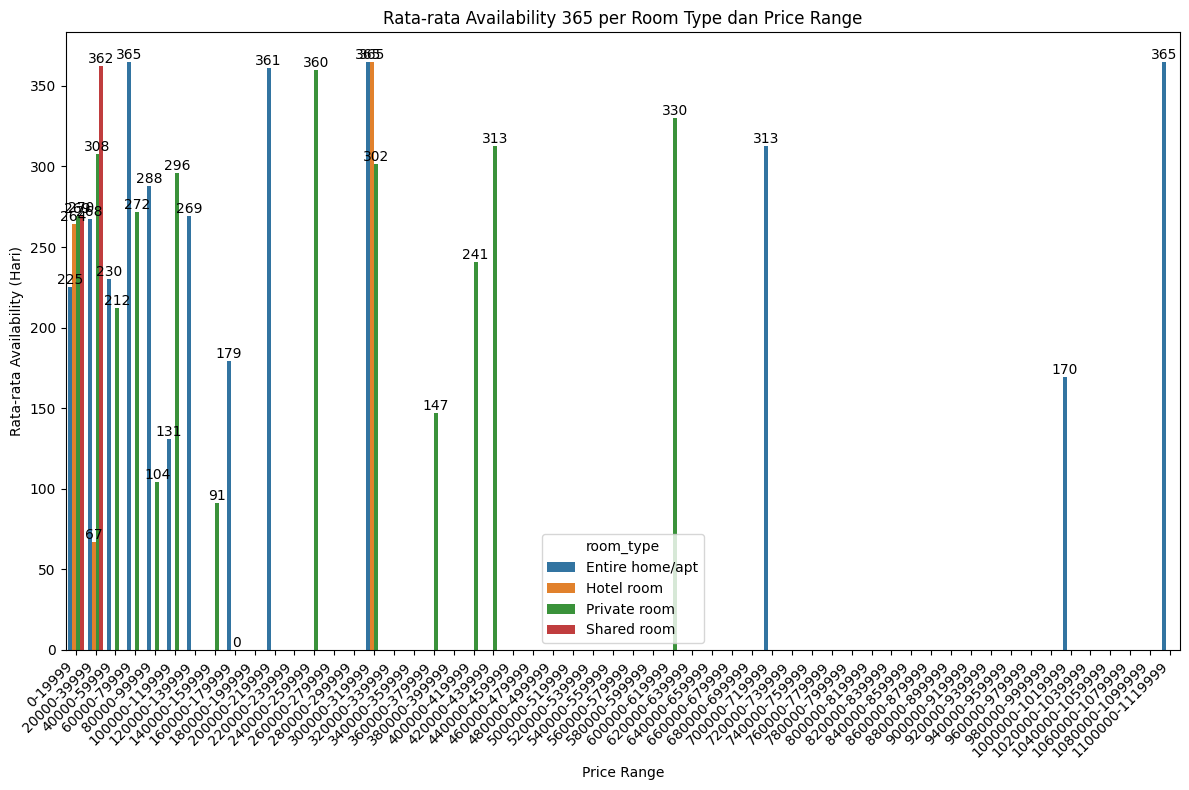

In [ ]:
# membuat bar plot dengan seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='price_range', y='availability_365', hue='room_type', data=grouped_data)

# Menambahkan label data pada bar plot
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.title('Rata-rata Availability 365 per Room Type dan Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rata-rata Availability (Hari)')
plt.xticks(rotation=45, ha='right') # Memutar label sumbu x agar tidak bertumpuk
plt.tight_layout()
plt.show()

## SEBARAN DATA AVAILABILITY_365 UNTUK ENTIRE HOME/APT BERDASARKAN PRICE RANGE

/tmp/ipython-input-60-2507762260.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_entire_home = entire_home_data.groupby('price_range')['availability_365'].mean().reset_index()


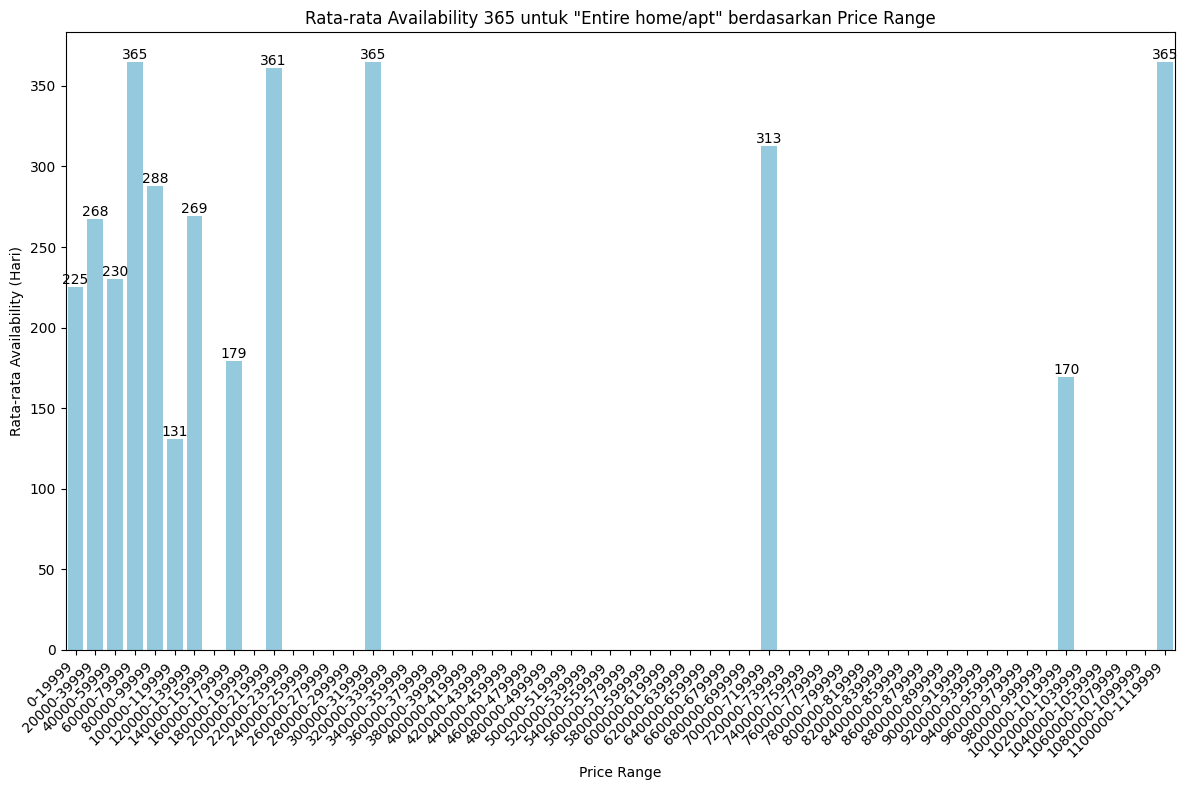

In [ ]:
# Filter data for 'Entire home/apt' room type
entire_home_data = data[data['room_type'] == 'Entire home/apt'].copy()

# Group by price_range and calculate mean availability_365
grouped_entire_home = entire_home_data.groupby('price_range')['availability_365'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='price_range', y='availability_365', data=grouped_entire_home, color='skyblue')

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.title('Rata-rata Availability 365 untuk "Entire home/apt" berdasarkan Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rata-rata Availability (Hari)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# Filter data for 'Entire home/apt' room type
entire_home_data = data[data['room_type'] == 'Entire home/apt'].copy()

# Group by price_range and calculate the count
entire_home_count = entire_home_data.groupby('price_range').size().reset_index(name='count')

# Merge the availability data with the count data
entire_home_summary = grouped_entire_home.merge(entire_home_count, on='price_range')

# Rename availability_365 to Average_Availability
entire_home_summary = entire_home_summary.rename(columns={'availability_365': 'Average_Availability'})

# Display the table
entire_home_summary

/tmp/ipython-input-61-2820141311.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entire_home_count = entire_home_data.groupby('price_range').size().reset_index(name='count')


,price_range,Average_Availability,count
0,0-19999,225.070588,8840
1,20000-39999,267.657895,38
2,40000-59999,230.285714,7
3,60000-79999,365.000000,3
4,80000-99999,288.000000,4
5,100000-119999,130.857143,7
6,120000-139999,269.000000,2
7,140000-159999,NaN,0
8,160000-179999,179.000000,1
9,180000-199999,NaN,0


In [ ]:
# Filter the DataFrame to include only 'Entire home/apt' room type
entire_home_count = data[data['room_type'] == 'Entire home/apt'].shape[0]

print(f"The count of 'Entire home/apt' listings is: {entire_home_count}")

The count of 'Entire home/apt' listings is: 8912


Dari sebaran yang didapat untuk room_type entire_home/apt price range 0 - 19999 memiliki rata-rata availability yang rendah 225 hari dengan count 8840. Ini berarti ada 8840 listing kamar yang memiliki rata-rata waktu sewa atau booking 140 hari selama setahun. Adapun 4 price range yang memiliki nilai availability dibawah 225 hari akan tetapi jumlah listing kamarnya berbeda jauh.

In [ ]:
# Filter data for 'Entire home/apt' room type and price range 0-19999
entire_home_0_19999 = data_filtered[data_filtered['room_type'] == 'Entire home/apt'].copy()

# Group by price_range_2000 and calculate mean availability_365 and count
entire_home_summary_0_19999 = entire_home_0_19999.groupby('price_range_2000').agg(
    Average_Availability=('availability_365', 'mean'),
    Count=('price', 'count')
).reset_index()

# Display the table
entire_home_summary_0_19999

/tmp/ipython-input-63-3940984688.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entire_home_summary_0_19999 = entire_home_0_19999.groupby('price_range_2000').agg(


,price_range_2000,Average_Availability,Count
0,0-1999,223.732431,5692
1,2000-3999,222.631603,2158
2,4000-5999,224.543233,532
3,6000-7999,244.213483,178
4,8000-9999,251.500000,130
5,10000-11999,257.816667,60
6,12000-13999,240.612903,31
7,14000-15999,277.413793,29
8,16000-17999,312.600000,15
9,18000-19999,294.400000,15


Kemudian dari price range 0 - 19999 dilakukan pengamatan lebih lanjut dengan memecah menjadi tiap 2000

### KONKLUSI AVAILABILITY_365 UNTUK ROOM TYPE ENTIRE HOME/APT

1.   Dari hasil analisa yang didapat untuk tipe kamar Entire_home/apt harga yang menghasilkan availability_365 yang baik dengan nilai rata-rata 223 hari adalah berkisar antara 0 - 4000 dengan total listing sekitar 7800.
2.   Terdapat listing price range yang jauh lebih mahal dengan nilai availability yang lebih baik. Akan tetapi perbedaan jumlah listingnya terlalu jauh.

3.   Untuk room_type Entire_home/apt price range yang terbaik adalah berkisar 0 - 4000






## SEBARAN DATA AVAILABILITY_365 UNTUK HOTEL ROOM BERDASARKAN PRICE RANGE

/tmp/ipython-input-64-699827924.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_hotel_room = hotel_room_data.groupby('price_range')['availability_365'].mean().reset_index()


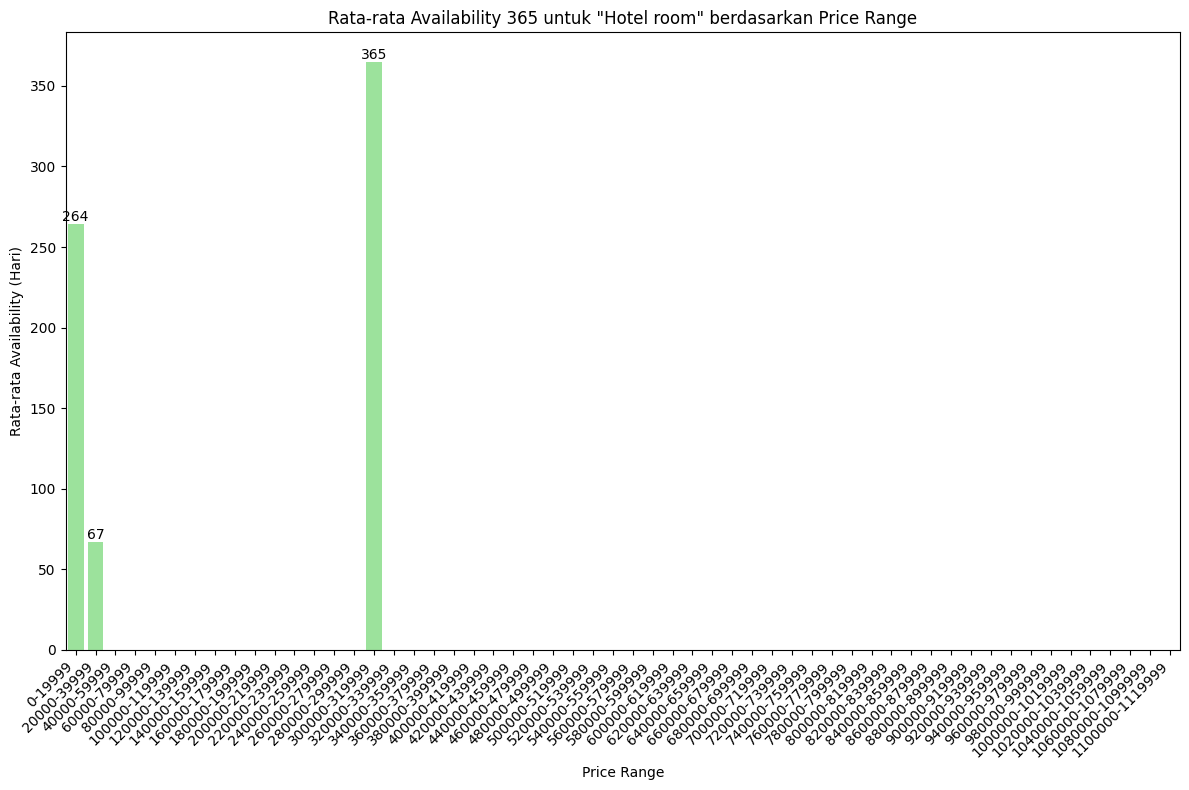

In [ ]:
# Filter data for 'Hotel room' room type
hotel_room_data = data[data['room_type'] == 'Hotel room'].copy()

# Group by price_range and calculate mean availability_365
grouped_hotel_room = hotel_room_data.groupby('price_range')['availability_365'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='price_range', y='availability_365', data=grouped_hotel_room, color='lightgreen')

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.title('Rata-rata Availability 365 untuk "Hotel room" berdasarkan Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rata-rata Availability (Hari)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# Filter data for 'Hotel room' room type
hotel_room_data = data[data['room_type'] == 'Hotel room'].copy()

# Group by price_range and calculate the count
hotel_room_count = hotel_room_data.groupby('price_range').size().reset_index(name='count')

# Merge the availability data with the count data
hotel_room_summary = grouped_hotel_room.merge(hotel_room_count, on='price_range')

# Rename availability_365 to Average_Availability
hotel_room_summary = hotel_room_summary.rename(columns={'availability_365': 'Average_Availability'})

# Display the table
hotel_room_summary

/tmp/ipython-input-65-4254103473.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_room_count = hotel_room_data.groupby('price_range').size().reset_index(name='count')


,price_range,Average_Availability,count
0,0-19999,264.206522,644
1,20000-39999,67.000000,4
2,40000-59999,NaN,0
3,60000-79999,NaN,0
4,80000-99999,NaN,0
5,100000-119999,NaN,0
6,120000-139999,NaN,0
7,140000-159999,NaN,0
8,160000-179999,NaN,0
9,180000-199999,NaN,0


In [ ]:
# Filter the DataFrame to include only 'Hotel room' room type
hotel_room_count = data[data['room_type'] == 'Hotel room'].shape[0]

print(f"The count of 'Hotel room' listings is: {hotel_room_count}")

The count of 'Hotel room' listings is: 649


Dari data untuk room_type Hotel room sebaran data terbanyak terdapat pada price range 0 - 19999 yaitu sebanyak 644 listing dengan nilai rata-rata availability 264 hari, lalu price range 20000 - 39999 sebanyak 4 listing dengan rata-rata avaialbility 67. Sisanya listing yang memiliki price range lebih dari 40000 hanya terdapat satu kamar saja yaitu pada price range 300000 - 319999 dengan nilai availability 365 hari

In [ ]:
# Filter data for 'Hotel room' room type and price range 0-19999
hotel_room_0_19999 = data_filtered[data_filtered['room_type'] == 'Hotel room'].copy()

# Group by price_range_2000 and calculate mean availability_365 and count
hotel_room_summary_0_19999 = hotel_room_0_19999.groupby('price_range_2000').agg(
    Average_Availability=('availability_365', 'mean'),
    Count=('price', 'count')
).reset_index()

# Display the table
hotel_room_summary_0_19999


/tmp/ipython-input-67-2555185928.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_room_summary_0_19999 = hotel_room_0_19999.groupby('price_range_2000').agg(


,price_range_2000,Average_Availability,Count
0,0-1999,276.071053,380
1,2000-3999,267.337662,154
2,4000-5999,214.491228,57
3,6000-7999,236.794118,34
4,8000-9999,244.727273,11
5,10000-11999,179.500000,2
6,12000-13999,0.000000,2
7,14000-15999,217.333333,3
8,16000-17999,NaN,0
9,18000-19999,92.000000,1


Kemudian dilakukan pengamatan lebih lanjut untuk price range 0 - 19999 dengan memecahnya menjadi 2000 step.

### KONKLUSI AVAILABILITY_365 UNTUK ROOM TYPE HOTEL ROOM



1.   Total listing untuk Hotel room adalah sebanyak 649 kamar.
2.   Hotel room hanya memiliki satu listing kamar yang price rangenya lebih dari 40000.

3.   Price range terbaik untuk Hotel room adalah berkisar 0 - 4000 sebanyak 500an kamar dengan nilai rata - rata availability berkisar 270 hari.
4.   Terdapat price range dengan harga yang lebih mahal dan memiliki nilai rata-rata availability yang lebih baik. Akan tetapi jumlah listingnya hanya sedikit.





## SEBARAN DATA AVAILABILITY_365 UNTUK PRIVATE ROOM BERDASARKAN PRICE RANGE

/tmp/ipython-input-68-1855971818.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_private_room = private_room_data.groupby('price_range')['availability_365'].mean().reset_index()


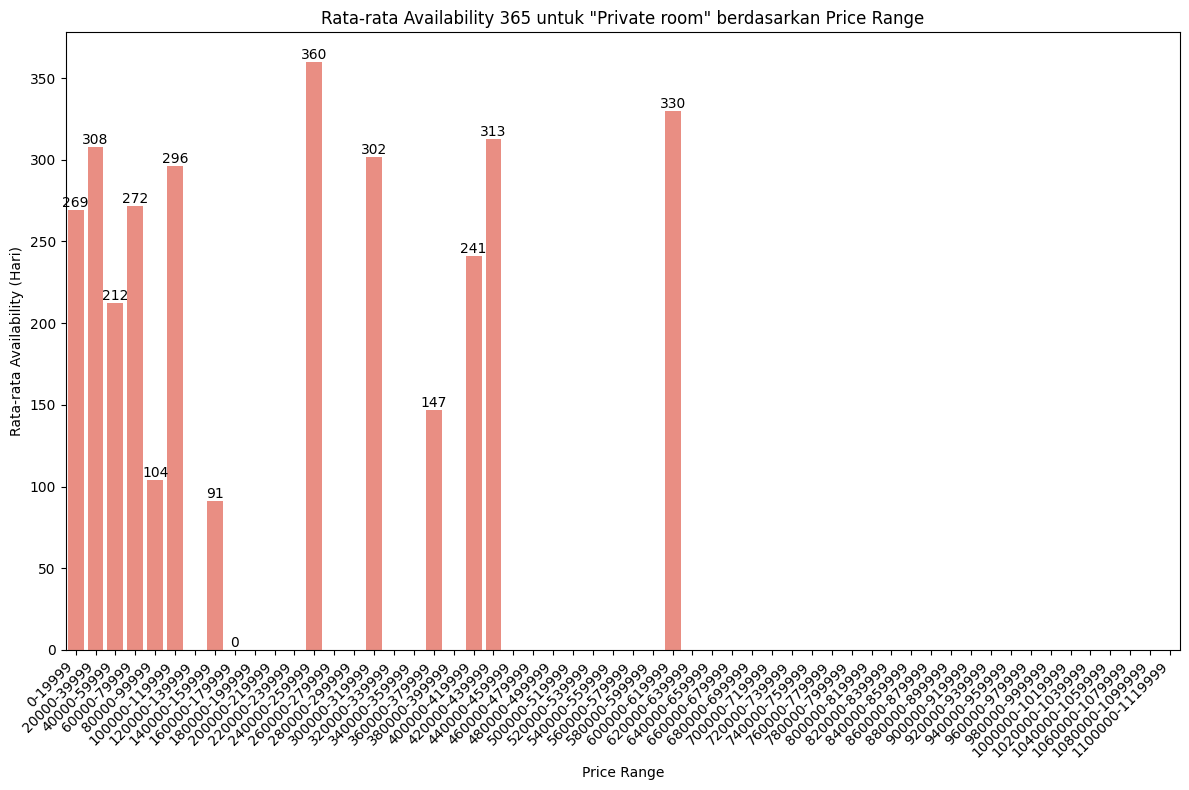

In [ ]:
# Filter data for 'Private room' room type
private_room_data = data[data['room_type'] == 'Private room'].copy()

# Group by price_range and calculate mean availability_365
grouped_private_room = private_room_data.groupby('price_range')['availability_365'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='price_range', y='availability_365', data=grouped_private_room, color='salmon')

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.title('Rata-rata Availability 365 untuk "Private room" berdasarkan Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rata-rata Availability (Hari)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# Filter data for 'Private room' room type
private_room_data = data[data['room_type'] == 'Private room'].copy()

# Group by price_range and calculate mean availability_365
grouped_private_room = private_room_data.groupby('price_range')['availability_365'].mean().reset_index()

# Group by price_range and calculate the count
private_room_count = private_room_data.groupby('price_range').size().reset_index(name='count')

# Merge the availability data with the count data
private_room_summary = grouped_private_room.merge(private_room_count, on='price_range')

# Rename availability_365 to Average_Availability
private_room_summary = private_room_summary.rename(columns={'availability_365': 'Average_Availability'})

# Display the table
private_room_summary


/tmp/ipython-input-69-1795636492.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_private_room = private_room_data.groupby('price_range')['availability_365'].mean().reset_index()
/tmp/ipython-input-69-1795636492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  private_room_count = private_room_data.groupby('price_range').size().reset_index(name='count')


,price_range,Average_Availability,count
0,0-19999,269.381719,5711
1,20000-39999,307.615385,26
2,40000-59999,212.333333,6
3,60000-79999,272.000000,7
4,80000-99999,104.000000,2
5,100000-119999,296.000000,4
6,120000-139999,NaN,0
7,140000-159999,91.000000,1
8,160000-179999,0.000000,1
9,180000-199999,NaN,0


In [ ]:
# Filter the DataFrame to include only 'Private room' room type
private_room_count = data[data['room_type'] == 'Private room'].shape[0]

print(f"The count of 'Private room' listings is: {private_room_count}")

The count of 'Private room' listings is: 5770


Berdasarkan Data untuk Private room sebaran data terbanyak ada pada price range 0-19999 yaitu sebanyak 5711 listing dengan nilai rata-rata availability 269. Hal ini menjadikan price range 0-19999 adalah harga terbaik karena memiliki jumlah listing dan rata-rata availability yang baik juga. Adapun beberapa price range yang lebih mahal dan memiliki nilai availability lebih baik akan tetapi perbedaan jumlah listingnya terlalu signifikan.

In [ ]:
# Filter data for 'Private room' room type and price range 0-19999
private_room_0_19999 = data_filtered[data_filtered['room_type'] == 'Private room'].copy()

# Group by price_range_2000 and calculate mean availability_365 and count
private_room_summary_0_19999 = private_room_0_19999.groupby('price_range_2000').agg(
    Average_Availability=('availability_365', 'mean'),
    Count=('price', 'count')
).reset_index()

# Display the table
private_room_summary_0_19999

/tmp/ipython-input-71-2242397656.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  private_room_summary_0_19999 = private_room_0_19999.groupby('price_range_2000').agg(


,price_range_2000,Average_Availability,Count
0,0-1999,267.891555,4168
1,2000-3999,267.250996,1004
2,4000-5999,295.228916,249
3,6000-7999,277.195876,97
4,8000-9999,283.433333,60
5,10000-11999,291.714286,56
6,12000-13999,272.550000,40
7,14000-15999,251.166667,18
8,16000-17999,240.272727,11
9,18000-19999,217.375000,8


Dari price range 0-19999 dilakukan penyederhanaan kembali menggunakan 2000 step untuk melihat hasil yang lebih akurat

### KONKLUSI AVAILABILITY_365 UNTUK ROOM TYPE PRIVATE ROOM



1.   Penyebaran data terbanyak untuk Private room berada pada price range 0 - 1999 dengan total listing sebanyak 4168
2.   Price range 0-1999 menjadi harga yang terbaik untuk jenis ruangan Private room dengan nilai rata-rata availability berkisar 268 hari.

3.   Terdapat price range yang lebih besar harganya dan memiliki nilai rata-rata availability yang lebih baik, akan tetapi perbedaan jumlah listing dari price range tersebut terlalu jauh






## SEBARAN DATA AVAILABILITY_365 UNTUK SHARED ROOM BERDASARKAN PRICE RANGE

/tmp/ipython-input-72-3141562623.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_shared_room = shared_room_data.groupby('price_range')['availability_365'].mean().reset_index()


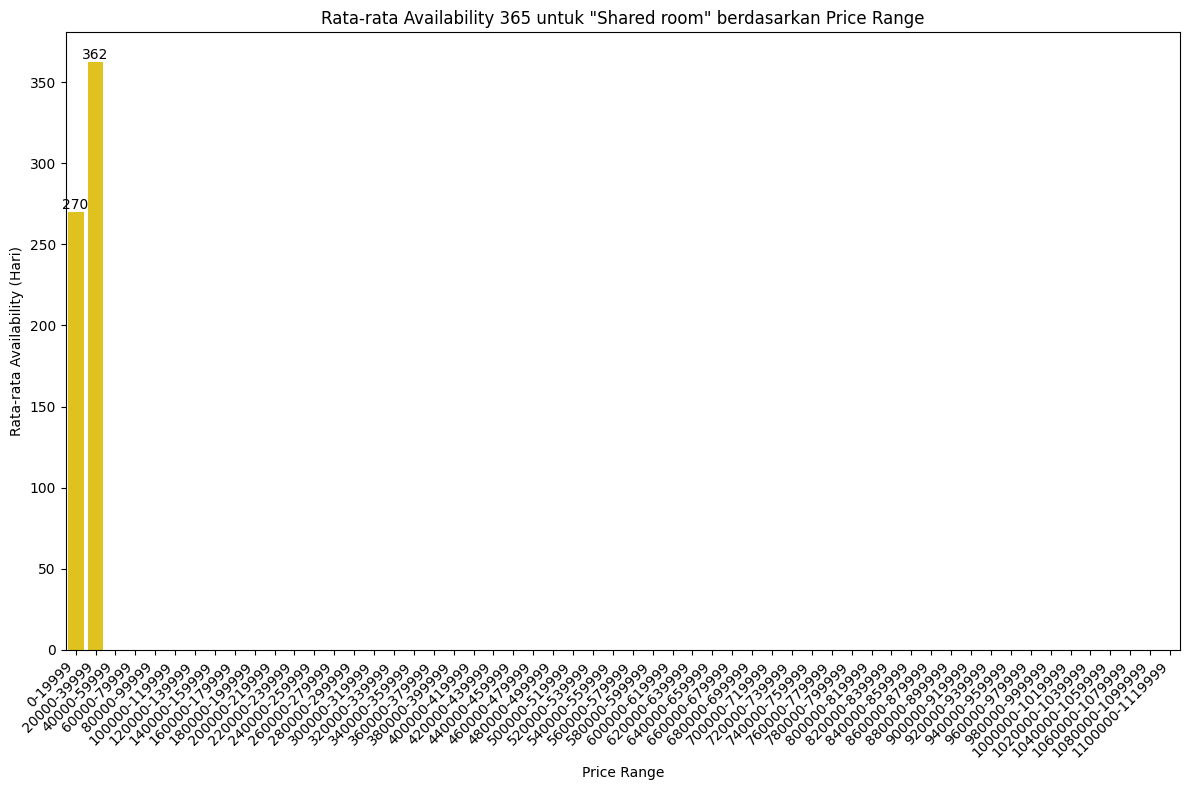

In [ ]:
# Filter data for 'Shared room' room type
shared_room_data = data[data['room_type'] == 'Shared room'].copy()

# Group by price_range and calculate mean availability_365
grouped_shared_room = shared_room_data.groupby('price_range')['availability_365'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='price_range', y='availability_365', data=grouped_shared_room, color='gold')

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.title('Rata-rata Availability 365 untuk "Shared room" berdasarkan Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rata-rata Availability (Hari)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# Filter data for 'Shared room' room type
shared_room_data = data[data['room_type'] == 'Shared room'].copy()

# Group by price_range and calculate mean availability_365
grouped_shared_room = shared_room_data.groupby('price_range')['availability_365'].mean().reset_index()

# Group by price_range and calculate the count
shared_room_count = shared_room_data.groupby('price_range').size().reset_index(name='count')

# Merge the availability data with the count data
shared_room_summary = grouped_shared_room.merge(shared_room_count, on='price_range')

# Rename availability_365 to Average_Availability
shared_room_summary = shared_room_summary.rename(columns={'availability_365': 'Average_Availability'})

# Display the table
shared_room_summary

/tmp/ipython-input-73-1230851334.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_shared_room = shared_room_data.groupby('price_range')['availability_365'].mean().reset_index()
/tmp/ipython-input-73-1230851334.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shared_room_count = shared_room_data.groupby('price_range').size().reset_index(name='count')


,price_range,Average_Availability,count
0,0-19999,269.792706,521
1,20000-39999,362.500000,2
2,40000-59999,NaN,0
3,60000-79999,NaN,0
4,80000-99999,NaN,0
5,100000-119999,NaN,0
6,120000-139999,NaN,0
7,140000-159999,NaN,0
8,160000-179999,NaN,0
9,180000-199999,NaN,0


In [ ]:
# Filter the DataFrame to include only 'Shared room' room type
shared_room_count = data[data['room_type'] == 'Shared room'].shape[0]

print(f"The count of 'Shared room' listings is: {shared_room_count}")

The count of 'Shared room' listings is: 523


Dari data untuk room type Shared room sebaran data yang terbanyak ada pada price range 0-19999 dengan total nilai 521 listing, dan juga memiliki nilai rata-rata availability yang baik yaitu 270 hari

In [ ]:
# Filter data for 'Shared room' room type and price range 0-19999
shared_room_0_19999 = data_filtered[data_filtered['room_type'] == 'Shared room'].copy()

# Group by price_range_2000 and calculate mean availability_365 and count
shared_room_summary_0_19999 = shared_room_0_19999.groupby('price_range_2000').agg(
    Average_Availability=('availability_365', 'mean'),
    Count=('price', 'count')
).reset_index()

# Display the table
shared_room_summary_0_19999

/tmp/ipython-input-75-2111027376.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shared_room_summary_0_19999 = shared_room_0_19999.groupby('price_range_2000').agg(


,price_range_2000,Average_Availability,Count
0,0-1999,270.397566,493
1,2000-3999,226.428571,14
2,4000-5999,312.000000,7
3,6000-7999,364.500000,2
4,8000-9999,365.000000,1
5,10000-11999,NaN,0
6,12000-13999,147.666667,3
7,14000-15999,NaN,0
8,16000-17999,365.000000,1
9,18000-19999,NaN,0


Dari price range 0-19999 dilakukan penyederhanaan kembali dengan menggunakan step 2000 untuk dilakukan pengamatan lebih baik

### KONKLUSI  AVAILABILITY_365 UNTUK ROOM TYPE SHARED ROOM



1.   Total listing untuk Shared room adalah 523 kamar.
2.   Price Range terbaik untuk Shared room ada pada 0-1999 dengan nilai rata-rata availability 270 hari dan jumlah listing sebanyak 493 kamar.

3.   Terdapat price range yang lebih mahal dengan nilai rata-rata availability yang lebih baik, akan tetapi perbedaan jumlah listingnya signifikan
2.   Shared room tidak memiliki listing kamar dengan price range lebih dari 40000





# KONKLUSI ANALISA



1.   Room_type yang paling banyak memiliki sebaran data adalah Entire_home/apt dengan nilai 8912 listing, diikuti oleh private_room 5570 listing, hotel_room 649 listing, dan terakhir shared_room 523 listing.
2.  Price_range untuk masing-masing type room bervariatif.

3.   Entire_home/apt price_range terbaiknya ada pada 0 - 4000 dengan rata-rata availability 223 hari dengan total listing berkisar 7800 listing kamar.
4.   Hotel_room price_range terbaiknya ada pada 0 - 4000 dengan rata-rata availability 270 hari dengan total listing berkisar 500 listing kamar.

5.   Private_room price_range terbaiknya ada pada 0 - 2000 dengan rata-rata availability 268 hari dengan total listing berkisar 4200 listing kamar.
6.   Shared_room price_range terbaiknya ada pada 0 - 1999 dengan rata-rata availability 270 hari dengan total listing 493 listing kamar.

7.   Dari keempat room_type yang telah dianalisa dapat disimpulkan room_type dan price mempengaruhi availability hari. Hal ini dapat dilihat dari berbedanya rata-rata availability, price_range dan juga sebaran listing dari keempat room_type.
8.   Semakin murah price_rangenya maka semakin baik pula nilai availabilitynya dan juga semakin banyak juga besaran listing kamarnya.

9.   Untuk setiap room_type ada beberapa anomali dengan nilai price_range yang mahal memiliki nilai availability yang cenderung lebih baik. Akan tetapi banyaknya listing anomali untuk tiap type_room tersebut sangat sedikit tidak mencapai 10 listing.











# ANALISA LEBIH LANJUT

## MENGAMBIL SAMPEL DATA ROOM TYPE DENGAN MELIHAT SEBARAN DATA NEIGHBOURHOOD

In [ ]:
# Filter data for 'Entire home/apt' room type
entire_home_data_analysis = data[data['room_type'] == 'Entire home/apt'].copy()

# Group by neighbourhood and calculate count, price range, average price, min price availability, max price availability
entire_home_neighbourhood_summary = entire_home_data_analysis.groupby('neighbourhood').agg(
    Count=('neighbourhood', 'size'),
    Min_Price=('price', 'min'),
    Max_Price=('price', 'max'),
    Average_Price=('price', 'mean')
).reset_index()

# Function to get availability for a specific price within a neighbourhood
def get_availability_for_price(row, price_col):
    price_value = row[price_col]
    neighbourhood_value = row['neighbourhood']
    availability_data = entire_home_data_analysis[(entire_home_data_analysis['neighbourhood'] == neighbourhood_value) & (entire_home_data_analysis['price'] == price_value)]
    if not availability_data.empty:
        # Return the availability_365 of the first listing with that price in that neighbourhood
        return availability_data['availability_365'].iloc[0]
    return None # Handle cases where a price doesn't exist (shouldn't happen with min/max)

# Apply the function to get availability for min and max prices
entire_home_neighbourhood_summary['Min_Price_Availability'] = entire_home_neighbourhood_summary.apply(lambda row: get_availability_for_price(row, 'Min_Price'), axis=1)
entire_home_neighbourhood_summary['Max_Price_Availability'] = entire_home_neighbourhood_summary.apply(lambda row: get_availability_for_price(row, 'Max_Price'), axis=1)

# Display the resulting table
entire_home_neighbourhood_summary

,neighbourhood,Count,Min_Price,Max_Price,Average_Price,Min_Price_Availability,Max_Price_Availability
0,Bang Bon,2,1200,2000,1600.000000,365,365
1,Bang Kapi,124,346,20000,1586.911290,326,365
2,Bang Khae,35,350,3687,1714.600000,300,365
3,Bang Khen,48,400,4500,1331.250000,361,180
4,Bang Kho laen,93,499,10000,1646.000000,151,365
5,Bang Khun thain,7,650,21818,6210.714286,67,365
6,Bang Na,278,350,35000,1785.895683,365,365
7,Bang Phlat,132,400,28000,1780.886364,206,79
8,Bang Rak,351,598,300000,3869.917379,358,365
9,Bang Sue,170,386,32000,1391.200000,181,365


In [ ]:
# Filter data for 'Entire home/apt' room type and 'Dusit' neighbourhood
entire_home_dusit = data[(data['room_type'] == 'Entire home/apt') & (data['neighbourhood'] == 'Dusit')].copy()

# Display the first 12 rows of the filtered data
print(entire_home_dusit.head(12))

             id                                               name    host_id  \
121     2068795               Wow! Entire 3 story house in Bangkok    9390848   
366     3768870                 Arty decor Apartment near old town     292635   
2295   14137682   Cozy Bungalow Studio (Puimek) in Nostalgic Dusit   78004265   
3028   17264861                  Newly deco contemporary residence   73126747   
3675   19356266     Cozy 1BR Thai-Style House | Big Garden | Dusit   32858545   
6929   32248010  3-story House w Balcony near Old Town/Grand Pa...  242022662   
7447   33815713      Stunning Luxury Royal RiverHouse-4B.Riverside  108262170   
8075   35722523                                 Baan thanon ranong   31210864   
8883   38222965                    New experience with local house   31210864   
11656  49679312    " Cozy and Warm house in Samsen /Dusit Bangkok"   59260623   
11765  50205410                                       บ้านริมพระยา  405220576   
13371  67709419             

In [ ]:
# prompt: tampilkan table data entire home untuk neighbourhood tailing chan

# Filter data for 'Entire home/apt' room type and 'Taling Chan' neighbourhood
entire_home_talingchan = data[(data['room_type'] == 'Entire home/apt') & (data['neighbourhood'] == 'Taling Chan')].copy()

# Display the table for Taling Chan
entire_home_talingchan


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_range
1355,10179988,บ้านเดี่ยว 2 ชั้น มีโรงจอดรถ 4 ห้องนอน 4 ห้องน้ำ,37135412,ธนกฤต,Taling Chan,13.78558,100.43995,Entire home/apt,2500,1,0,0,0.00,1,365,0,0-19999
1862,12073398,Private Villa Near Bangkok Old City,59725484,Sye,Taling Chan,13.76369,100.41500,Entire home/apt,4086,5,1,2016-06-23 00:00:00,0.01,1,363,0,0-19999
3924,20418242,A house and private terrace by the canal,145636538,Patcharin,Taling Chan,13.77591,100.45361,Entire home/apt,1505,1,9,2022-11-09 00:00:00,0.16,1,357,1,0-19999
4618,23450083,Garden house home office Bts Bangwa,64624459,Garden House,Taling Chan,13.77880,100.44386,Entire home/apt,4975,30,0,0,0.00,2,268,0,0-19999
5501,27413609,HOME,206592012,Thamon,Taling Chan,13.77183,100.40850,Entire home/apt,8000,5,0,0,0.00,1,90,0,0-19999
6764,31696812,hi bangkok b&b,227766543,Srintip,Taling Chan,13.75242,100.45299,Entire home/apt,4500,1,0,0,0.00,1,364,0,0-19999
7504,33699209,Dahla Home,254019056,ดาหลา,Taling Chan,13.79243,100.41483,Entire home/apt,9900,1,0,0,0.00,1,180,0,0-19999
7521,33723540,Tuition and Apartment,254220303,Ping,Taling Chan,13.77335,100.41578,Entire home/apt,2210,1,0,0,0.00,1,365,0,0-19999
7537,33754905,Penguins have Apartment,254451970,Ling,Taling Chan,13.76709,100.41216,Entire home/apt,2461,1,0,0,0.00,1,365,0,0-19999
7543,33763567,Thfruhfhj Apartment,254512556,Ring,Taling Chan,13.75781,100.43174,Entire home/apt,2321,1,0,0,0.00,1,365,0,0-19999


## KONKLUSI SAMPLE DATA ROOM TYPE DENGAN NEIGHBOURHOOD

Listing kamar dengan price yang melebih price rata-rata akan memiliki nilai availability hari yang lebih banyak dari listing yang pricenya berkisar atau dibawah rata-rata price dari daerah tersebut.

# INSIGHTS



1.   Fokuskan pada tipe kamar Entire Home/Apt dan Private Room.

  *   Entire home dan Private room Memiliki jumlah listing paling banyak dengan rata-rata availability dan price range yang lebih baik.
  *   Rekomendasi :

      *   Tingkatkan kualitasnya dengan menambahkan fasilitas yang disediakan.
      *   Memberikan paket diskon untuk menambah daya tarik untuk listing kamar yang masih memiliki availability 300 hari keatas.




2.   Gunakan harga rata-rata sebagai acuan

  *   Listing kamar dengan harga yang tidak terlalu jauh dari harga rata-rata memiliki availability yang lebih baik.
  *   Rekomendasi :

      *   Gunakan acuan harga rata-rata dari setiap daerah dalam menentukan harga suatu listing kamar, untuk mencegah harga listing yang terlalu mahal.



In [ ]:
# Membuat file csv
data.to_csv('airbnb_bangkok_cleaned.csv', index=False)